## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import feature_engine
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\HP\Desktop\DataScience - DT\DSData-master\temperature.csv")
pd.set_option('display.max_columns',None)
df.head(10)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   
5      6.0  30-06-2013          31.9          23.5    52.437126    85.307251   
6      7.0  30-06-2013          31.4          24.4    56.287189    81.019760   
7      8.0  30-06-2013          32.1          23.6    52.326218    78.004539   
8      9.0  30-06-2013          31.4          22.0    55.338791    80.784607   
9     10.0  30-06-2013          31.6          20.5    56.651203    86.849632   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   
5         29.219342         23.822613  6.182295   50.231389   0.185279   
6         28.551859         24.238467  5.587135  125.110007   0.389600   
7         28.851982         23.819054  6.104417   42.011547   0.357856   
8         28.426975         23.332373  6.017135   85.110971   0.408766   
9         27.576705         22.527018  6.518841   63.006075   0.348292   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   
5   0.280818   0.232841   0.146363         0.0         0.0         0.0   
6   0.333570   0.270419   0.145705         0.0         0.0         0.0   
7   0.344928   0.272387   0.143841         0.0         0.0         0.0   
8   0.344800   0.264980   0.148911         0.0         0.0         0.0   
9   0.306255   0.245254   0.135443         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   
5         0.0  37.5102  127.042   54.6384  0.1457      5873.780762       31.5   
6         0.0  37.5776  126.838   12.3700  0.0985      5849.233398       30.9   
7         0.0  37.4697  126.910   52.5180  1.5629      5863.992188       31.1   
8         0.0  37.4967  126.826   50.9312  0.4125      5876.901367       31.3   
9         0.0  37.4562  126.955  208.5070  5.1782      5893.608398       30.5   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5  
5       24.0  
6       23.4  
7       22.9  
8       21.6  
9       21.0

In [3]:
df.sample(10)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
2035     11.0  19-07-2014          30.6          25.4    49.017315   
4645     21.0  30-08-2015          29.7          21.4    27.365864   
7133      9.0  06-08-2017          33.9          26.8    57.137627   
4335     11.0  18-08-2015          32.1          24.5    50.755337   
154       5.0  06-07-2013          33.5          23.0    64.033340   
5901      2.0  19-08-2016          31.5          25.0    58.670631   
5286     12.0  25-07-2016          31.3          24.8    49.364357   
783       9.0  31-07-2013          29.1          24.4    58.071590   
2297     23.0  29-07-2014          29.2          23.3    58.102562   
4754      5.0  04-07-2016          23.1          20.3    91.483444   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
2035    86.248360         32.230285         25.453630   6.912038   57.425618   
4645    84.687424         32.076827         22.093694   6.928418   13.902045   
7133    93.314613         32.677702         24.524429   6.054389  129.939828   
4335    86.510841         29.879274         24.380248   4.181780   43.496624   
154     94.197578         29.432474         22.854578   7.157178   91.651310   
5901    87.825546         31.215155         26.786808   4.751987   52.979610   
5286    83.271454         31.787880         26.537251   9.188946   29.431368   
783     89.558105         30.505463         24.389897   4.195728   99.402081   
2297    85.034416         30.783585         24.876179   5.517416   67.151692   
4754    97.585724         25.847620         20.070473  10.350618   35.449761   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
2035   0.137099   0.184811   0.108546   0.277552    0.001953    0.000000   
4645   0.014465   0.003057   0.085271   0.110552    0.000000    0.000000   
7133   0.049509   0.049352   0.043379   0.091763    0.000000    0.000000   
4335   0.189969   0.246358   0.560833   0.726984    0.000000    0.000000   
154    0.021723   0.068646   0.718361   0.843392    0.000000    0.000000   
5901   0.603070   0.395212   0.379314   0.535216    0.023253    0.000000   
5286   0.257459   0.110086   0.344170   0.119654    0.000000    0.000000   
783    0.280728   0.159049   0.163964   0.020767    0.000000    0.000000   
2297   0.156666   0.271808   0.166213   0.018987    0.000000    0.000000   
4754   0.917876   0.911062   0.790707   0.633218    2.288139    0.183682   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
2035    0.000000    0.000000  37.5372  127.085   28.7000  0.6233   
4645    0.000000    0.000000  37.5507  127.040   26.2980  0.5721   
7133    0.000000    0.000000  37.4967  126.826   50.9312  0.4125   
4335    0.000000    0.000000  37.5372  127.085   28.7000  0.6233   
154     0.090348    8.755219  37.5507  127.135   35.0380  0.5055   
5901    0.000000    0.000000  37.6046  127.032   44.7624  0.5141   
5286    0.000000    0.000000  37.5507  126.988  132.1180  0.5931   
783     0.000000    0.000000  37.4967  126.826   50.9312  0.4125   
2297    0.000000    0.000000  37.5372  126.891   15.5876  0.1554   
4754    0.635358    0.852151  37.5507  127.135   35.0380  0.5055   

      Solar radiation  Next_Tmax  Next_Tmin  
2035      5663.089355       33.1       25.5  
4645      4456.024414       31.2       22.1  
7133      5283.059082       34.1       25.2  
4335      4908.635254       30.6       24.9  
154       5818.317383       31.3       21.6  
5901      4838.724609       33.3       24.2  
5286      5589.288574       32.6       23.9  
783       5435.520020       32.5       23.6  
2297      5454.854980       33.3       25.5  
4754      5826.661133       25.6       19.1

### Problem Statement

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

#### Independent variables are:
    
    station - used weather station number: 1 to 25
    Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
    Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
    Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
    LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
    LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
    LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
    LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
    LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
    LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
    LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
    LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
    LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
    LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
    LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
    LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
    LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
    LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
    lat - Latitude (Â°): 37.456 to 37.645
    lon - Longitude (Â°): 126.826 to 127.135
    DEM - Elevation (m): 12.4 to 212.3
    Slope - Slope (Â°): 0.1 to 5.2
    Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
    Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
    Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

## Exploratory Data Analysis

In [4]:
df.shape

(7752, 25)

In [5]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [7]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7677.000000  7677.000000  7677.000000  7677.000000  7677.000000   
mean      0.368774     0.356080     0.318404     0.299191     0.591995   
std       0.262458     0.258061     0.250362     0.254348     1.945768   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146654     0.140615     0.101388     0.081532     0.000000   
50%       0.315697     0.312421     0.262555     0.227664     0.000000   
75%       0.575489     0.558694     0.496703     0.499489     0.052525   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat          lon  \
count  7677.000000  7677.000000  7677.000000  7752.000000  7752.000000   
mean      0.485003     0.278200     0.269407    37.544722   126.991397   
std       1.762807     1.161809     1.206214     0.050352     0.079435   
min       0.000000     0.000000     0.000000    37.456200   126.826000   
25%       0.000000     0.000000     0.000000    37.510200   126.937000   
50%       0.000000     0.000000     0.000000    37.550700   126.995000   
75%       0.018364     0.007896     0.000041    37.577600   127.042000   
max      21.621661    15.841235    16.655469    37.645000   127.135000   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  
count  7752.000000  7752.000000      7752.000000  7725.000000  7725.000000  
mean     61.867972     1.257048      5341.502803    30.274887    22.932220  
std      54.279780     1.370444       429.158867     3.128010     2.487613  
min      12.370000     0.098475      4329.520508    17.400000    11.300000  
25%      28.700000     0.271300      4999.018555    28.200000    21.300000  
50%      45.716000     0.618000      5436.345215    30.500000    23.100000  
75%      59.832400     1.767800      5728.316406    32.600000    24.600000  
max     212.335000     5.178230      5992.895996    38.900000    29.800000

<AxesSubplot:>

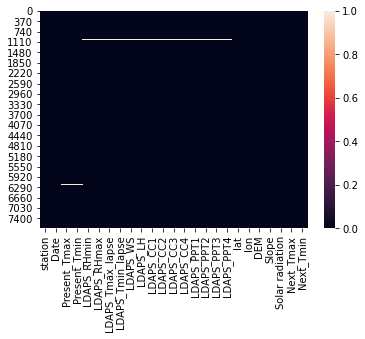

In [8]:
sns.heatmap(df.isna())

From looking at the dataset and studying the problem statement, we are able to draw the following conclusions

    1. There are 25 columns(23 features and 2 target variables)
       Target variables
                -- Next_Tmax: Next day maximum temperature
                -- Next_Tmin: Next day minimum temperature
       Of the 23 features, only one variable is categorical in nature - Date. Looking at the numerical columns, we are able to confirm that most of the columns are more or less normally distributed as the mean is very close to the median
    2. There are 7752 rows and we are able to see a few missing values in the dataset and since the number of missing values is low(less than 1%), we can eliminate them after a little more analysis and if we are not able to find good imputation techniques
    3. Mean is not equal to median, data does not follow normal distribution. There is high variance in solar radiation column while some columns such as lon and lat have variance close to zero. Difference between minimum, maximum and interquartile range is m=not equal which indicates presence of outliers.

<AxesSubplot:>

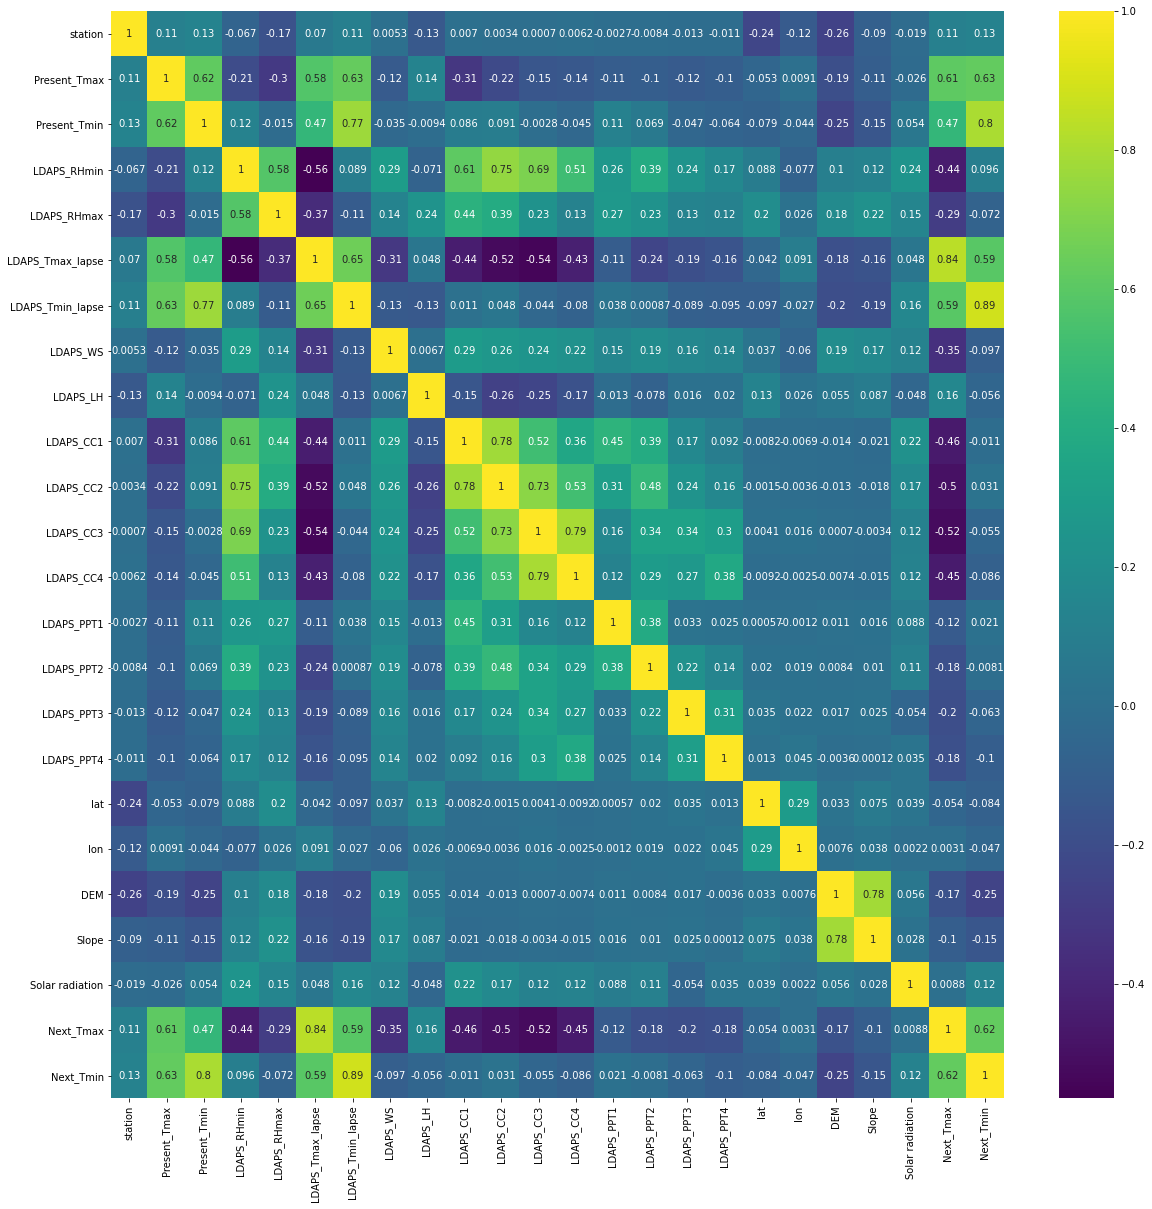

In [9]:
#checking for any highly correlated features in the dataset and plotting by means by heatmap
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='viridis')

Looking at the correlation between the features, we are able to confirm that there are a few columns that have high correlation. Lets try and analyze this further

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64

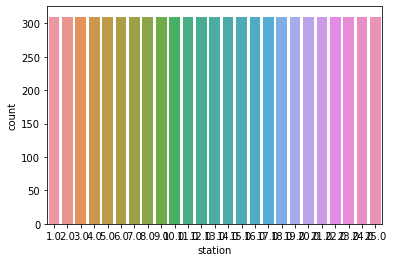

In [10]:
#looking at the station column
sns.countplot(df.station)
df['station'].value_counts()

<AxesSubplot:>

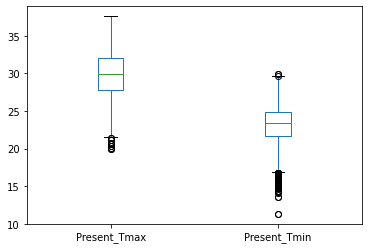

In [11]:
df[['Present_Tmax','Present_Tmin']].plot(kind='box')

In [12]:
#Since the missing columns are below the permissable limit(around 1%), deleting them and storing the results in a new df
df_clean = df.dropna()

In [13]:
df_clean.shape

(7588, 25)

<AxesSubplot:>

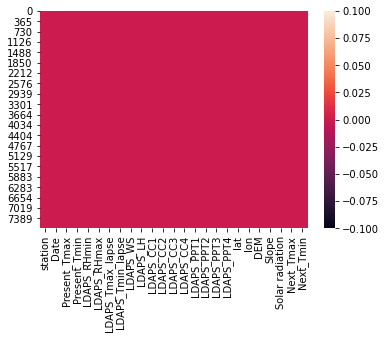

In [14]:
sns.heatmap(df_clean.isna())

Now, that we have eliminated the missing values, let us move ahead with outlier removal in order to proceed with our analysis

In [15]:
df_clean.Date.value_counts()

29-07-2013    25
05-07-2016    25
21-07-2014    25
25-07-2017    25
19-07-2015    25
              ..
06-07-2017    22
24-07-2015    22
13-08-2015    22
23-08-2017    22
30-06-2017    16
Name: Date, Length: 307, dtype: int64

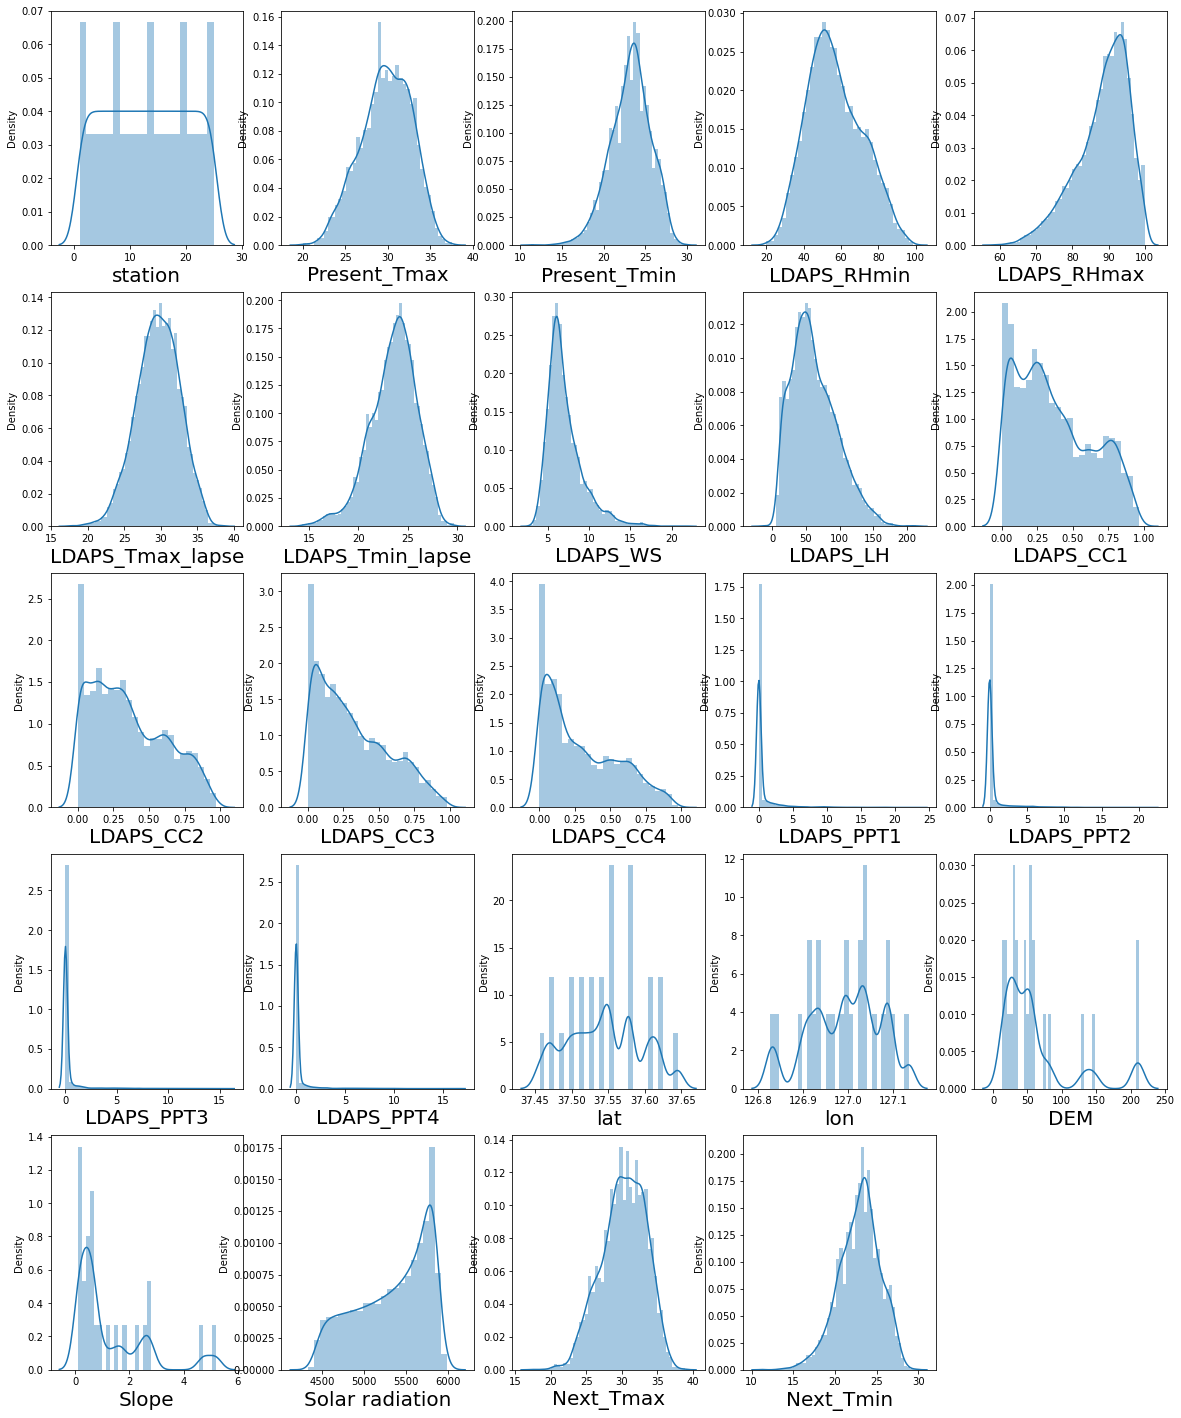

In [16]:
#plotting distributition plots for all the numerical features
plt.figure(figsize=(20,25))
num=1
for i in df_clean.columns:
    if i!='Date':
        if num<=len(df.columns):
            ax=plt.subplot(5,5,num)
            sns.distplot(df[i])
            plt.xlabel(i,fontsize=20)
        num+=1
plt.show()

From the above plots, we are able to draw the following conclusions

    1. Columns with bimodal distribution: Slope, Dem, Ion, Iat
    2. Station has a rectangular distribution plot
    3. All the columns have a normal distribution. We can fill their null values using mean.

In [17]:
#Separating categorical and continuous variables
cont=[i for i in df.columns if df[i].nunique()>30 and i!='Date']
cat=[i for i in df.columns if df[i].nunique()<30]

0.697000    310
0.266100    310
0.623300    310
2.785000    310
0.572100    310
0.098500    310
0.412500    310
2.686500    310
0.222300    310
0.155400    310
0.514100    310
5.178200    310
2.534800    310
0.855200    310
2.257900    310
0.133200    310
1.231300    310
1.562900    310
0.593100    310
0.505500    310
0.271300    310
0.145700    310
0.618000    310
1.767800    310
4.729600    310
0.098475      1
5.178230      1
Name: Slope, dtype: int64

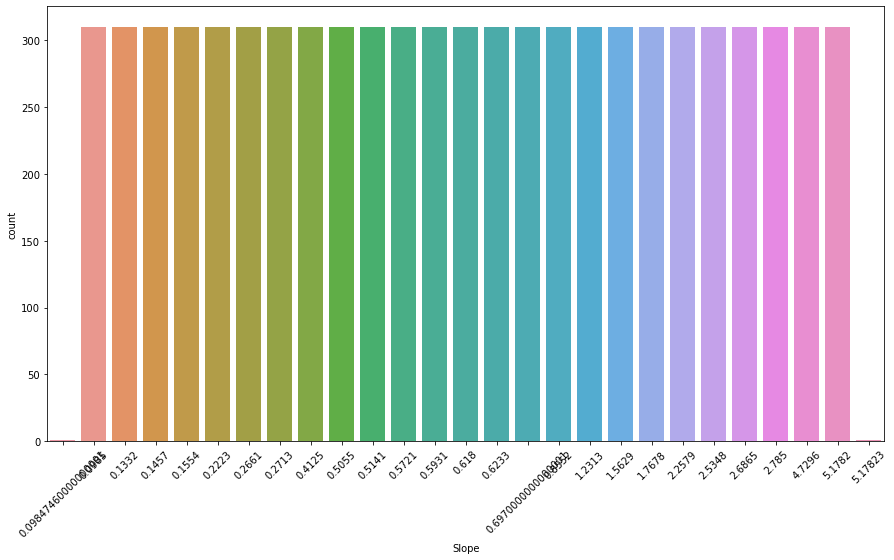

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(x='Slope',data=df)
plt.xticks(rotation=45)
df['Slope'].value_counts()

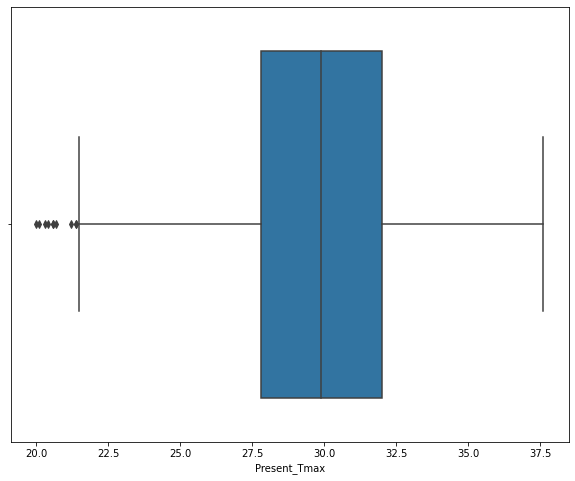

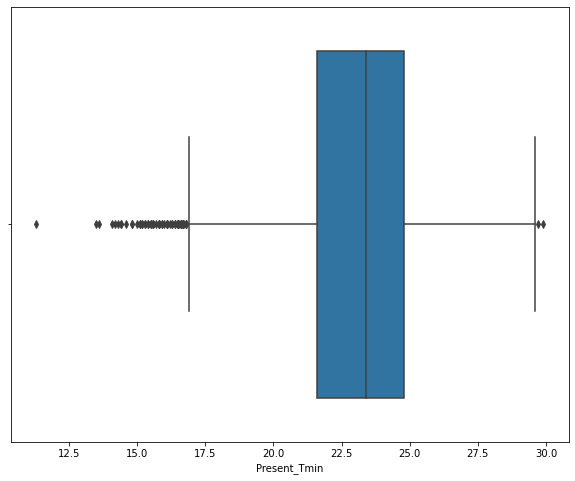

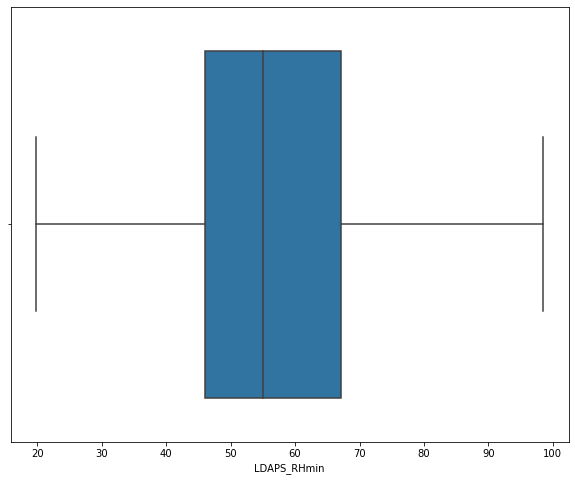

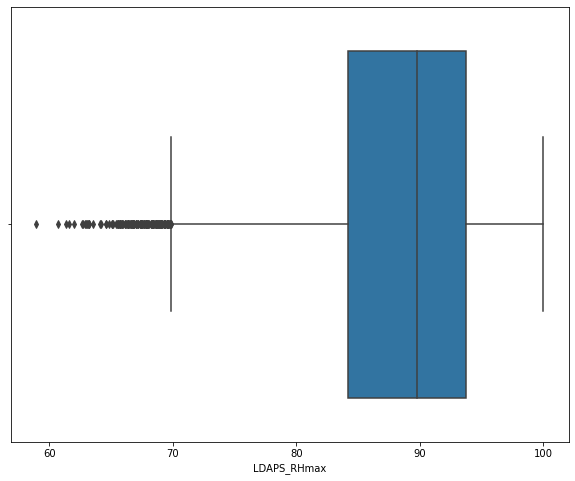

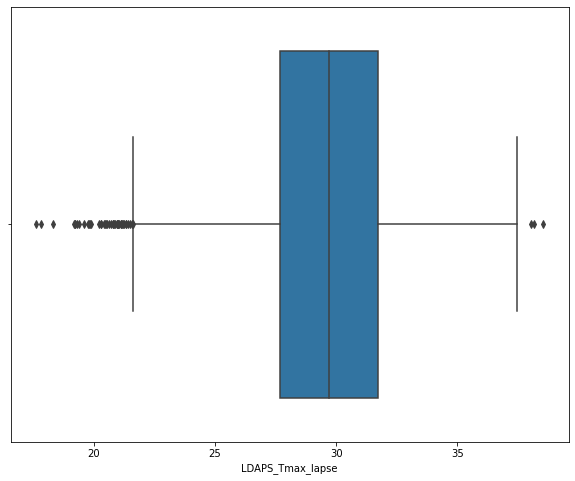

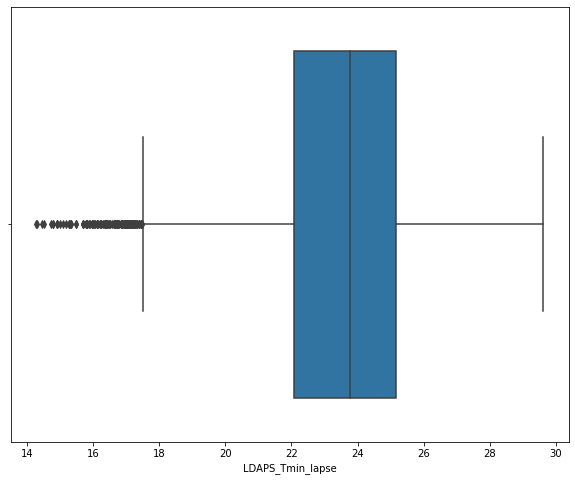

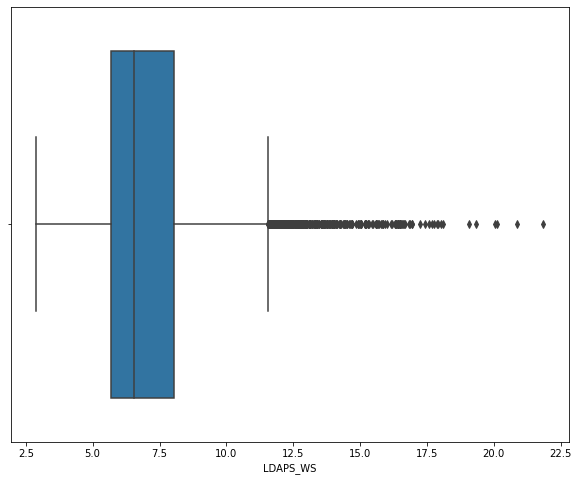

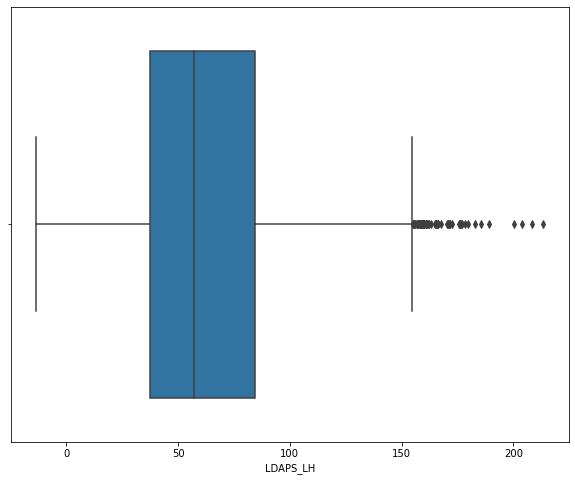

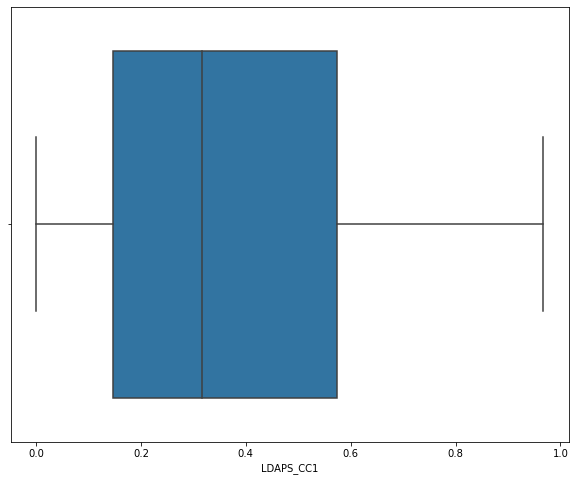

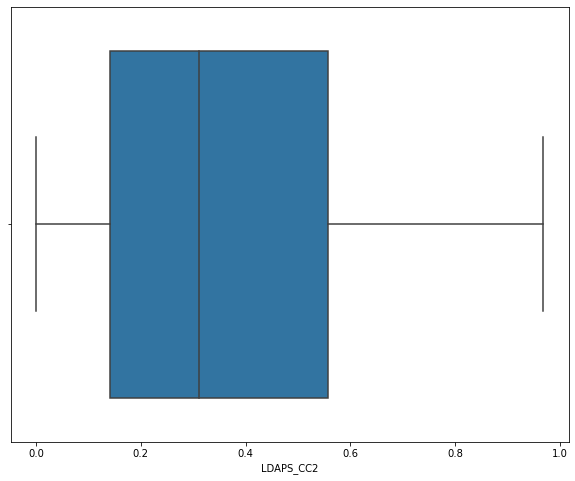

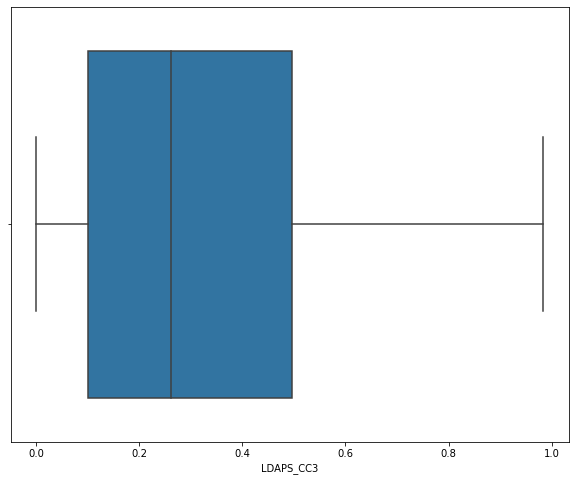

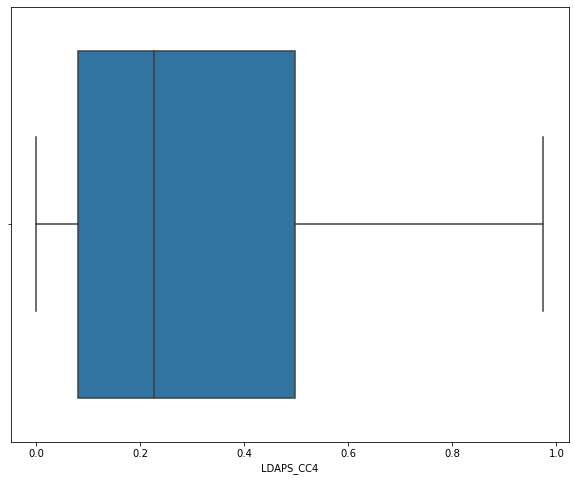

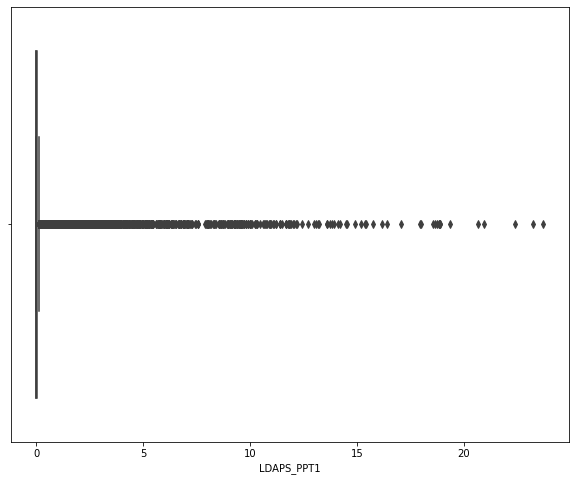

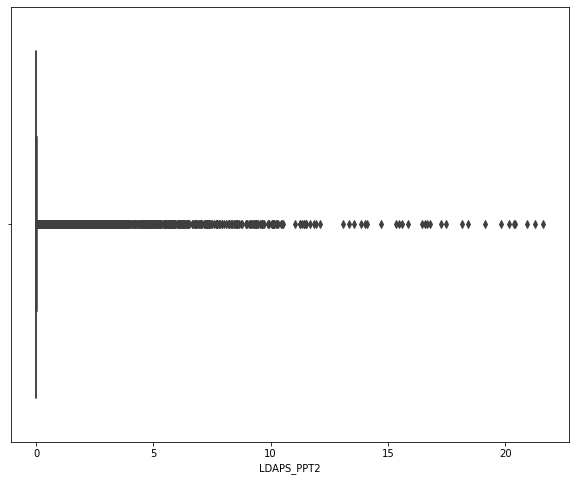

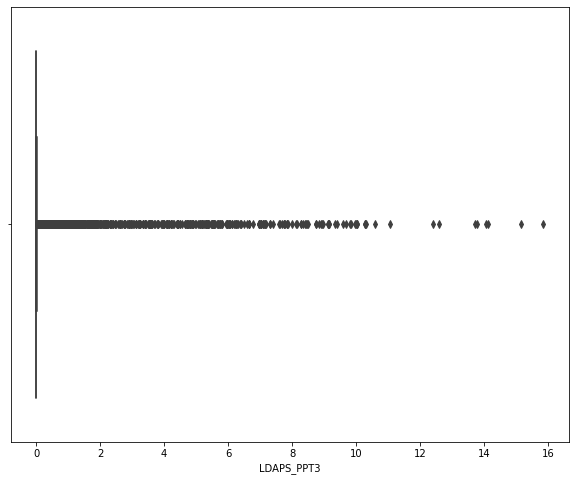

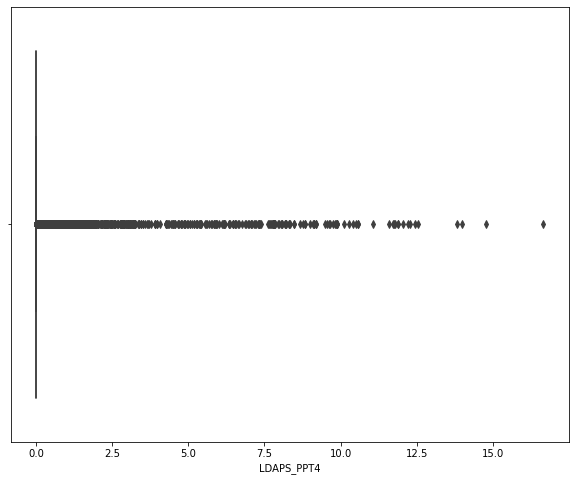

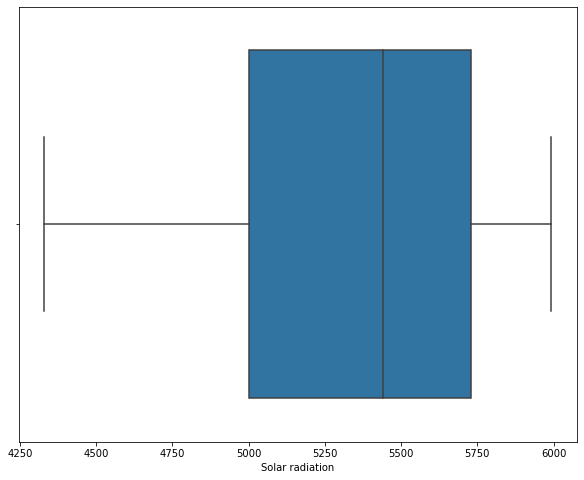

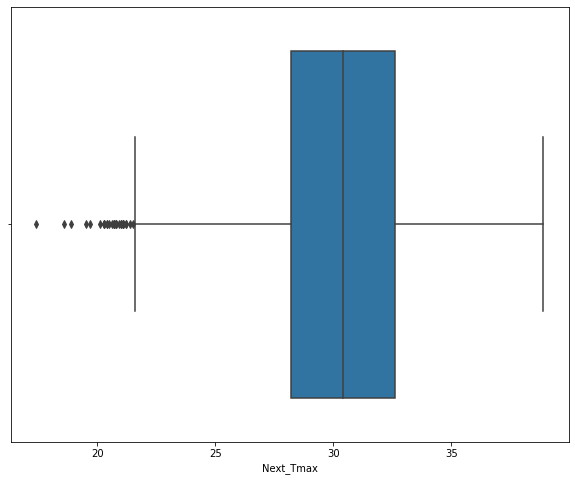

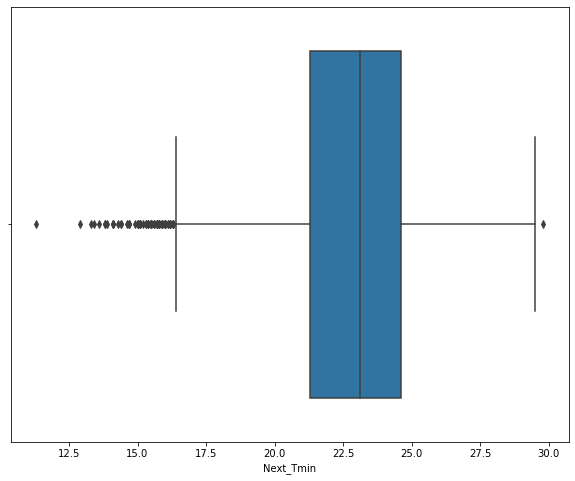

In [19]:
for i in cont:
    plt.figure(figsize=(10,8))
    sns.boxplot(df_clean[i])

37.5776    1240
37.5507    1240
37.5237     620
37.4697     620
37.5102     620
37.6181     620
37.4967     620
37.6046     620
37.5372     620
37.6450     311
37.4562     311
37.4832     310
Name: lat, dtype: int64

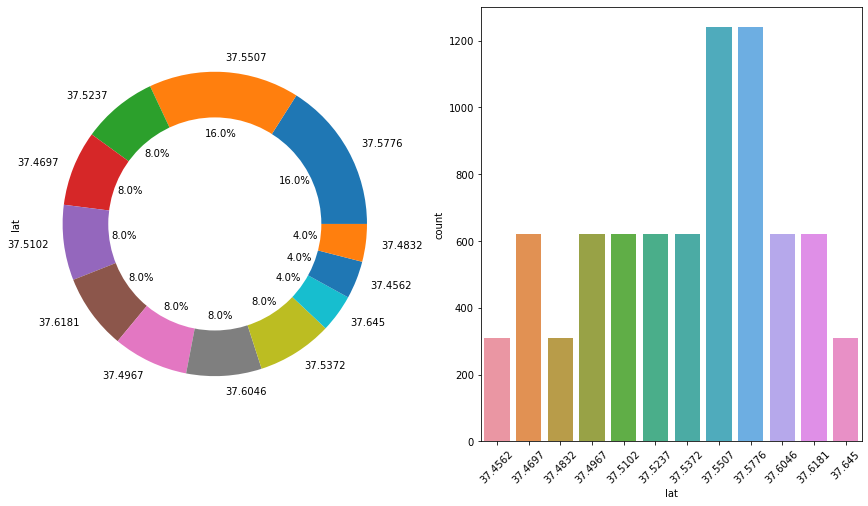

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['lat'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='lat',data=df)
plt.xticks(rotation=45)
df['lat'].value_counts()

There are 12 latitudes present, two of which have the highest count equal to 1240 while 7 of them have 620 counts and rest 3 have less than 350 counts.

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64

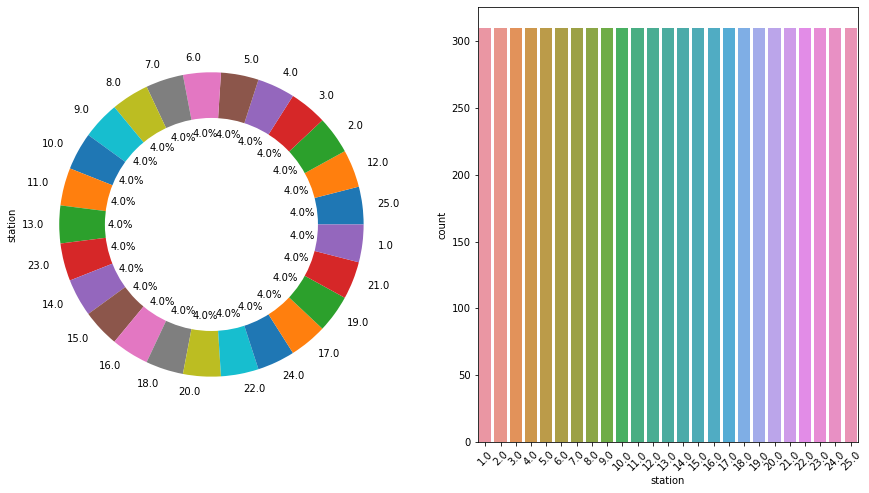

In [21]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['station'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='station',data=df)
plt.xticks(rotation=45)
df['station'].value_counts()

There are a total of 25 stations and each of them have 310 observations.

### Bi-variate anaysis

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

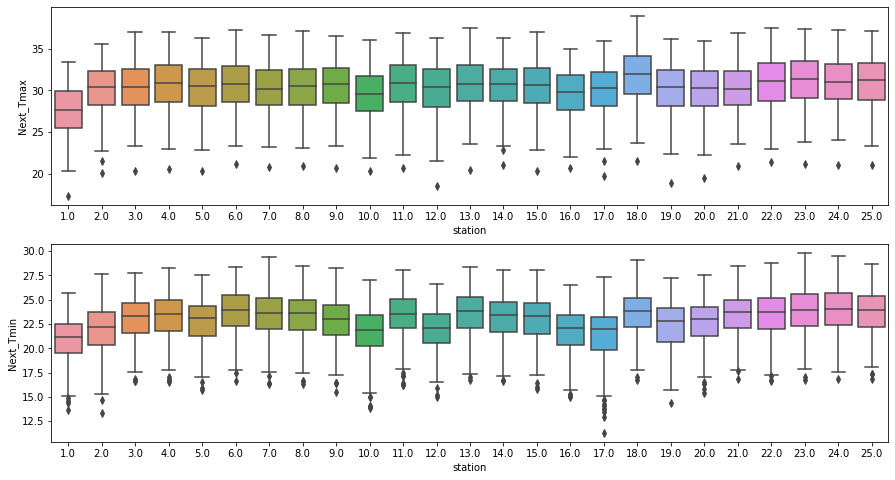

In [22]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.boxplot(x='station',y='Next_Tmax',data=df)
plt.subplot(2,1,2)
sns.boxplot(x='station',y='Next_Tmin',data=df)

Station 18 observes highest temperature for both Tmax and Tmin while station 1 observes lowest temperatures for both. It coud be because of their location

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '37.4562'),
  Text(1, 0, '37.4697'),
  Text(2, 0, '37.4832'),
  Text(3, 0, '37.4967'),
  Text(4, 0, '37.5102'),
  Text(5, 0, '37.5237'),
  Text(6, 0, '37.5372'),
  Text(7, 0, '37.5507'),
  Text(8, 0, '37.5776'),
  Text(9, 0, '37.6046'),
  Text(10, 0, '37.6181'),
  Text(11, 0, '37.645')])

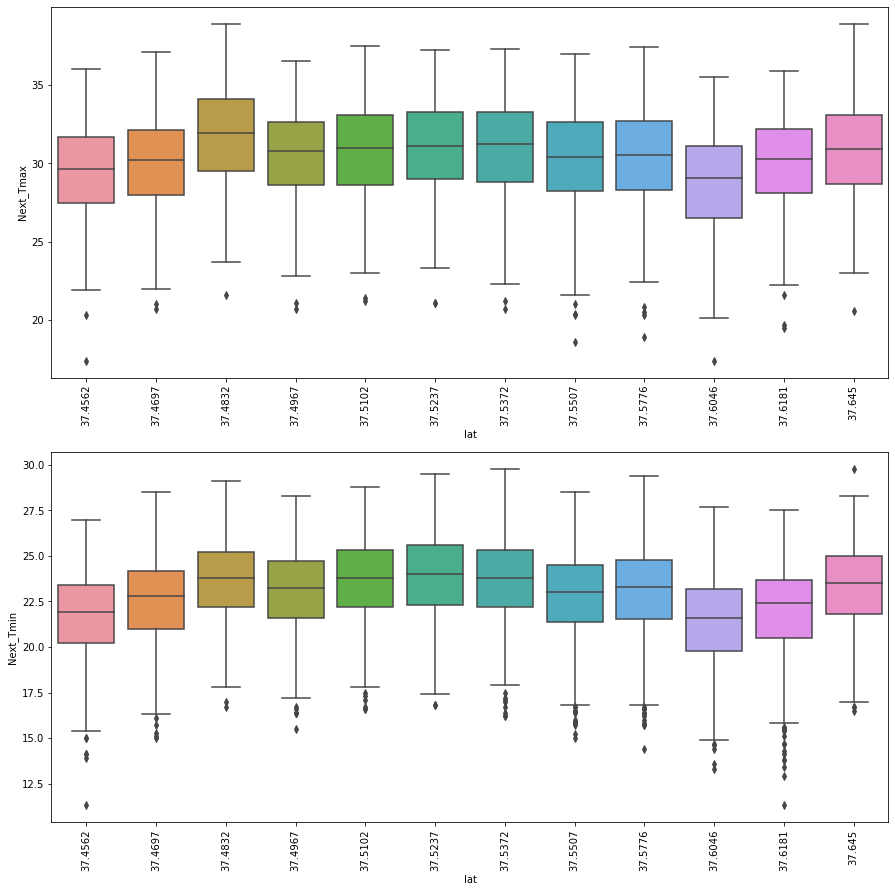

In [23]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.boxplot(x='lat',y='Next_Tmax',data=df)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.boxplot(x='lat',y='Next_Tmin',data=df)
plt.xticks(rotation=90)

Temperature seems to fall as the the latitude increases which is also a know fact. Highest temperature is observed at 37.645 for Tmax while this is not the case for tmin which could be because of the other factors that affect the temperature.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '126.82600000000001'),
  Text(1, 0, '126.838'),
  Text(2, 0, '126.891'),
  Text(3, 0, '126.90899999999999'),
  Text(4, 0, '126.91'),
  Text(5, 0, '126.927'),
  Text(6, 0, '126.93700000000001'),
  Text(7, 0, '126.93799999999999'),
  Text(8, 0, '126.955'),
  Text(9, 0, '126.97'),
  Text(10, 0, '126.988'),
  Text(11, 0, '126.991'),
  Text(12, 0, '126.995'),
  Text(13, 0, '127.00399999999999'),
  Text(14, 0, '127.022'),
  Text(15, 0, '127.024'),
  Text(16, 0, '127.03200000000001'),
  Text(17, 0, '127.04'),
  Text(18, 0, '127.042'),
  Text(19, 0, '127.05799999999999'),
  Text(20, 0, '127.083'),
  Text(21, 0, '127.085'),
  Text(22, 0, '127.086'),
  Text(23, 0, '127.09899999999999'),
  Text(24, 0, '127.135')])

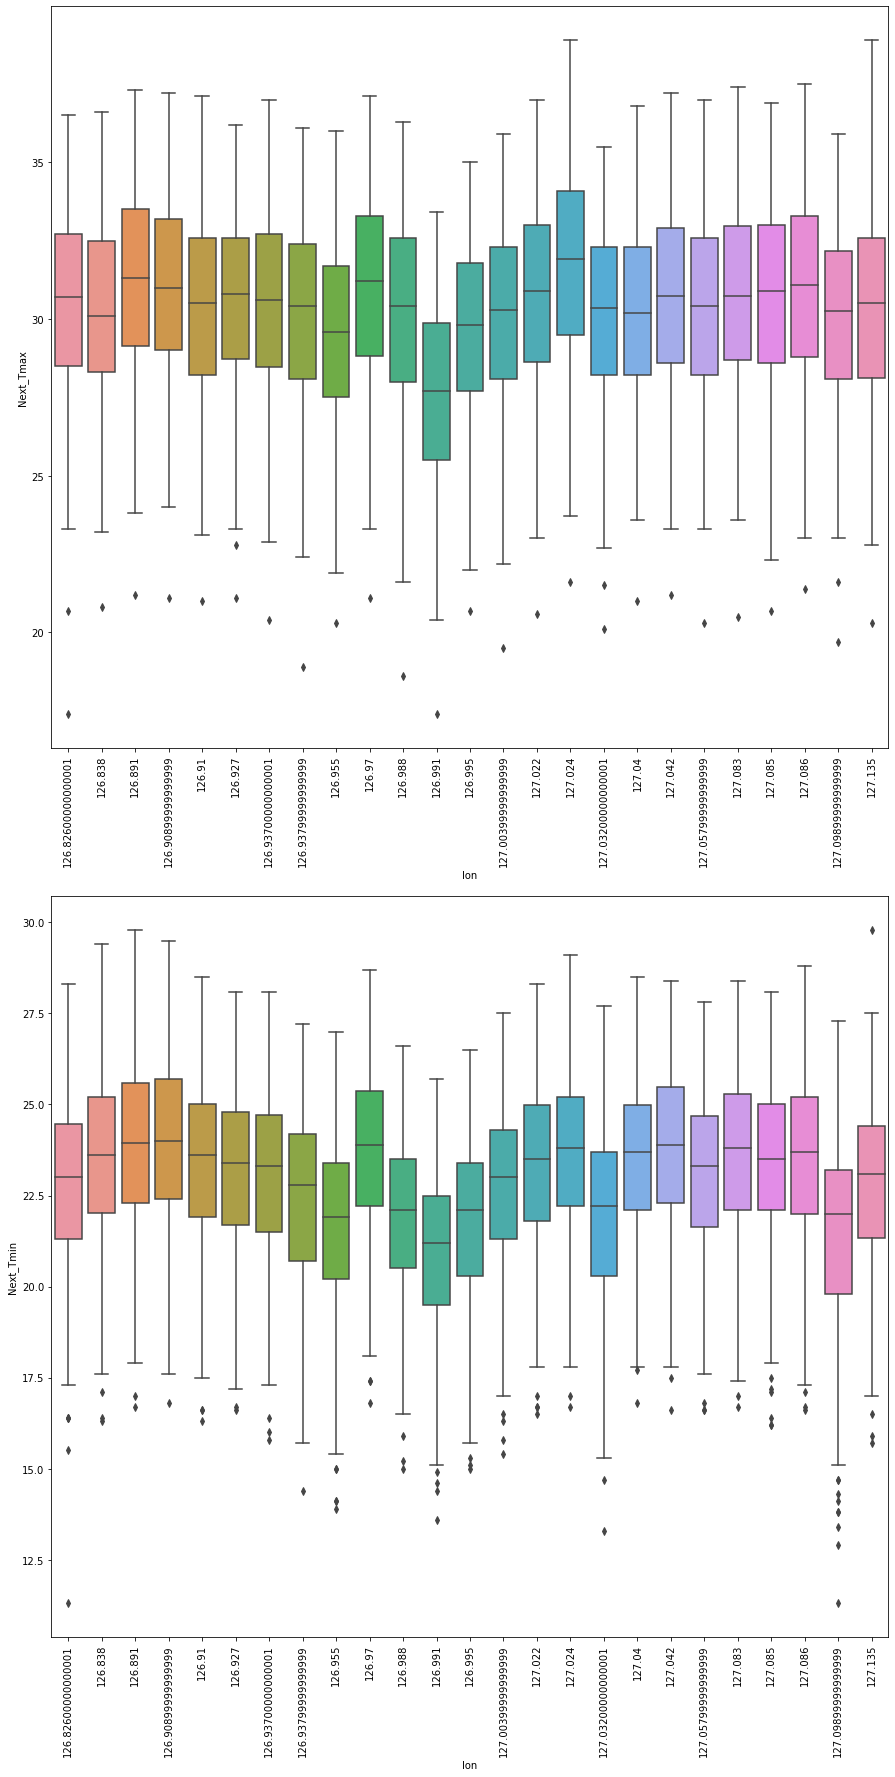

In [24]:
plt.figure(figsize=(15,30))
plt.subplot(2,1,1)
sns.boxplot(x='lon',y='Next_Tmax',data=df)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.boxplot(x='lon',y='Next_Tmin',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '12.37'),
  Text(1, 0, '15.5876'),
  Text(2, 0, '17.2956'),
  Text(3, 0, '19.5844'),
  Text(4, 0, '21.9668'),
  Text(5, 0, '26.298000000000002'),
  Text(6, 0, '28.7'),
  Text(7, 0, '30.0464'),
  Text(8, 0, '30.968000000000004'),
  Text(9, 0, '33.3068'),
  Text(10, 0, '35.038000000000004'),
  Text(11, 0, '44.7624'),
  Text(12, 0, '45.716'),
  Text(13, 0, '50.9312'),
  Text(14, 0, '52.518'),
  Text(15, 0, '53.4712'),
  Text(16, 0, '54.6384'),
  Text(17, 0, '56.4448'),
  Text(18, 0, '59.8324'),
  Text(19, 0, '75.0924'),
  Text(20, 0, '82.2912'),
  Text(21, 0, '132.118'),
  Text(22, 0, '146.554'),
  Text(23, 0, '208.507'),
  Text(24, 0, '212.335')])

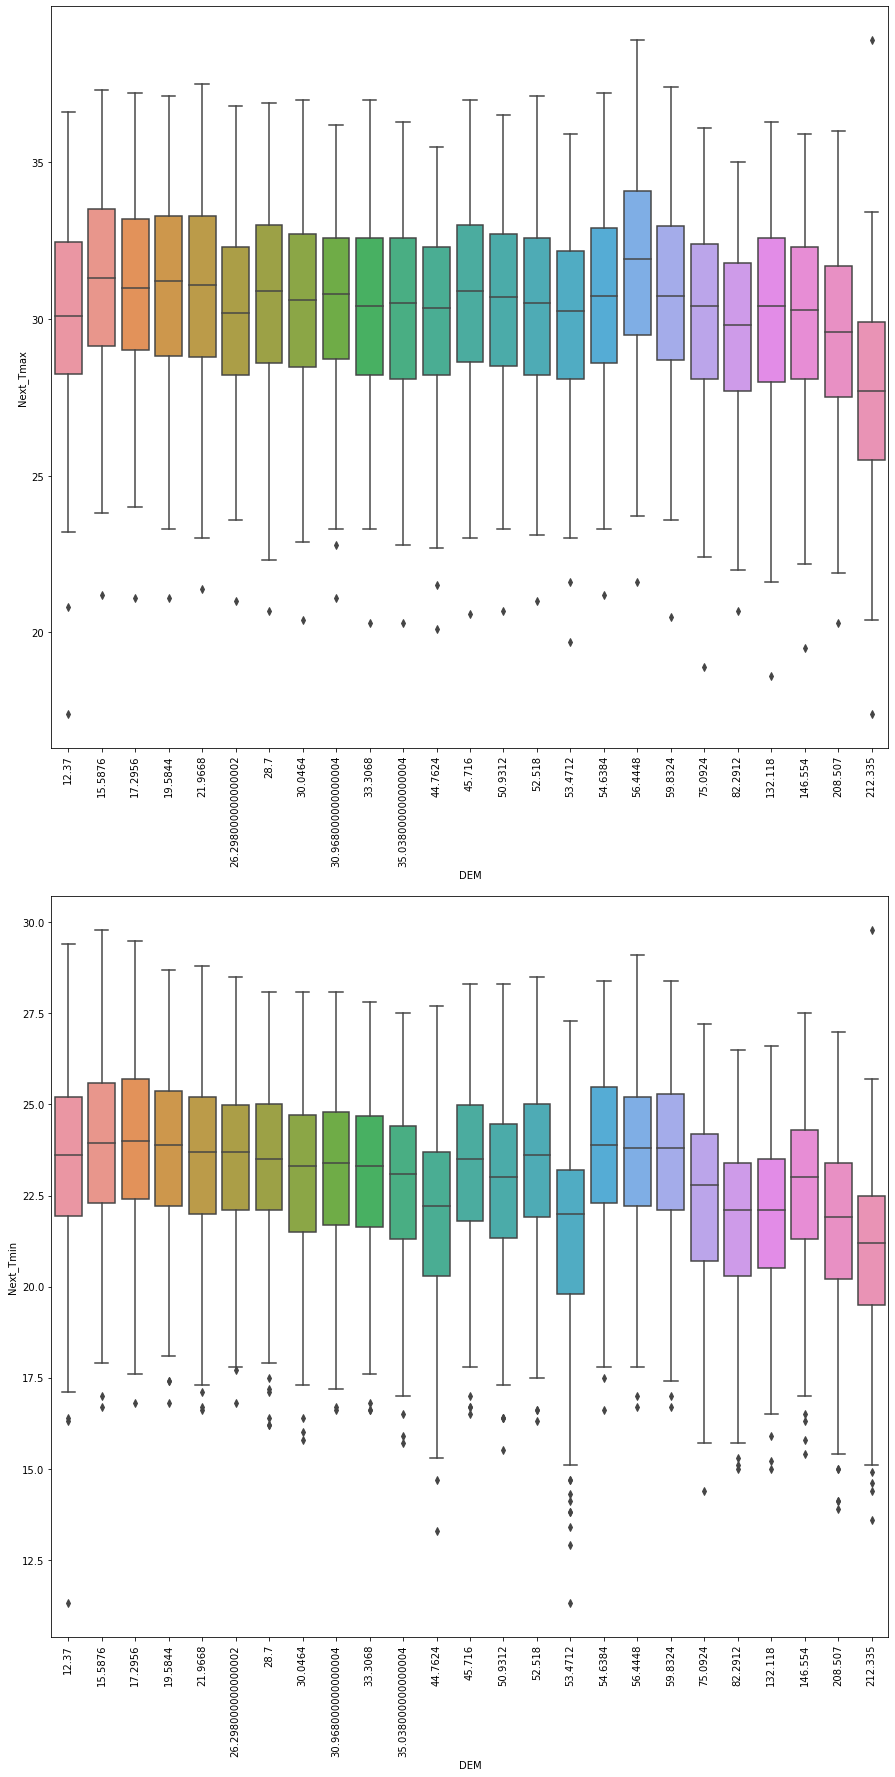

In [25]:
plt.figure(figsize=(15,30))
plt.subplot(2,1,1)
sns.boxplot(x='DEM',y='Next_Tmax',data=df)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.boxplot(x='DEM',y='Next_Tmin',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '0.09847460000000001'),
  Text(1, 0, '0.0985'),
  Text(2, 0, '0.1332'),
  Text(3, 0, '0.1457'),
  Text(4, 0, '0.1554'),
  Text(5, 0, '0.2223'),
  Text(6, 0, '0.2661'),
  Text(7, 0, '0.2713'),
  Text(8, 0, '0.4125'),
  Text(9, 0, '0.5055'),
  Text(10, 0, '0.5141'),
  Text(11, 0, '0.5721'),
  Text(12, 0, '0.5931'),
  Text(13, 0, '0.618'),
  Text(14, 0, '0.6233'),
  Text(15, 0, '0.6970000000000001'),
  Text(16, 0, '0.8552'),
  Text(17, 0, '1.2313'),
  Text(18, 0, '1.5629'),
  Text(19, 0, '1.7678'),
  Text(20, 0, '2.2579'),
  Text(21, 0, '2.5348'),
  Text(22, 0, '2.6865'),
  Text(23, 0, '2.785'),
  Text(24, 0, '4.7296'),
  Text(25, 0, '5.1782'),
  Text(26, 0, '5.17823')])

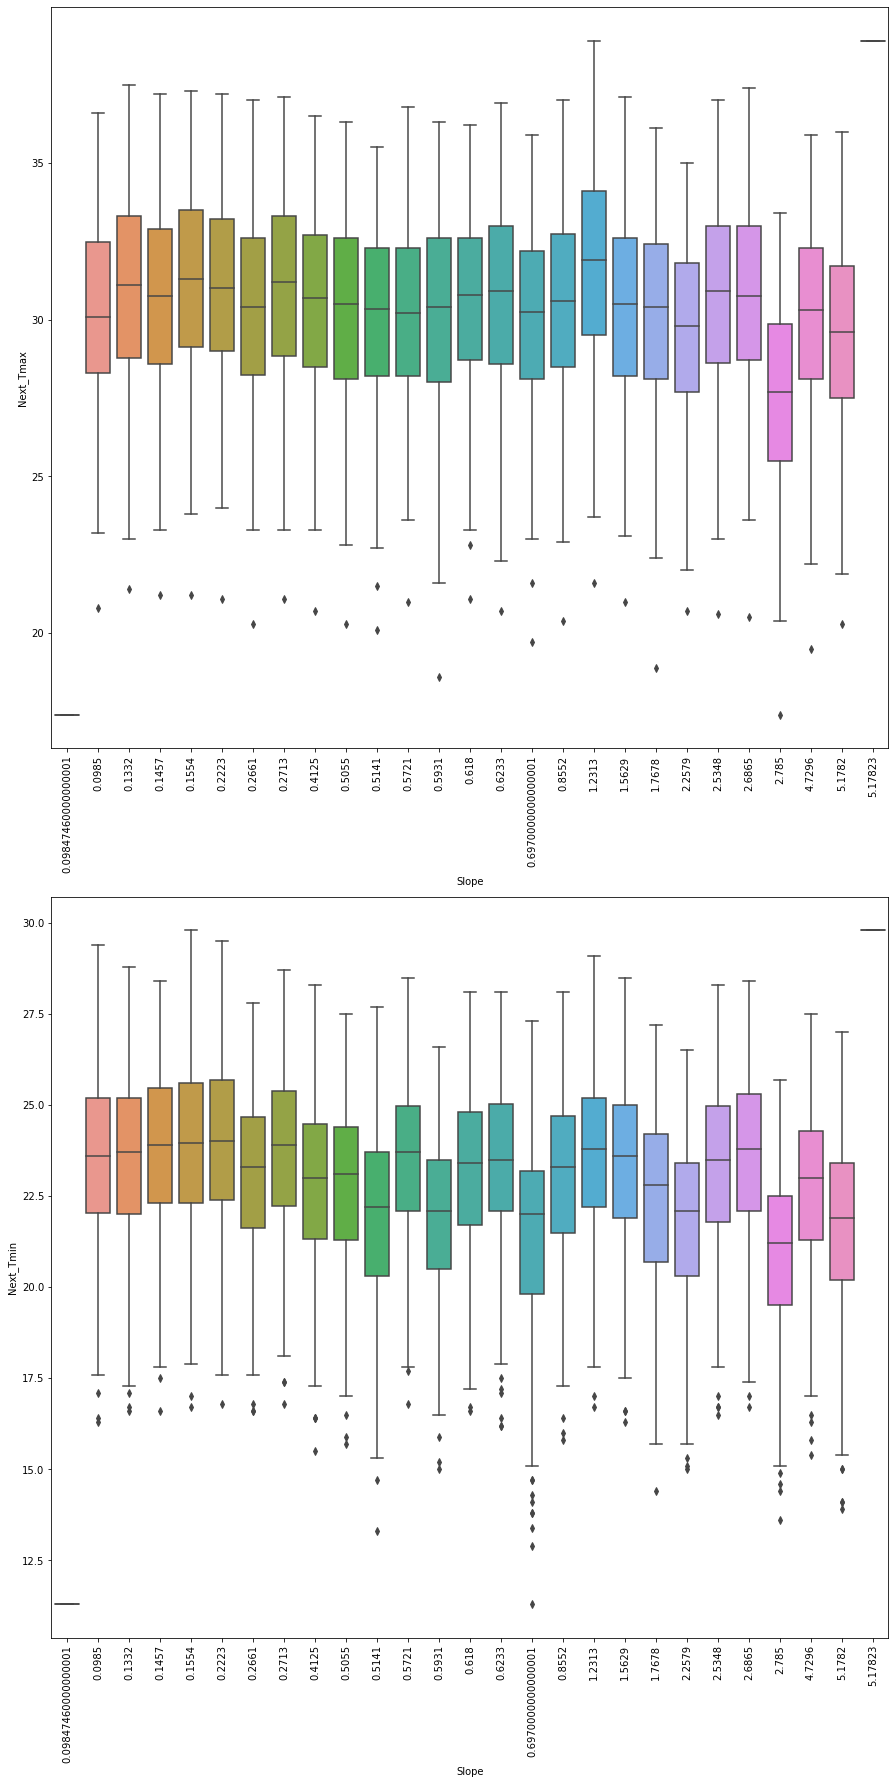

In [26]:
plt.figure(figsize=(15,30))
plt.subplot(2,1,1)
sns.boxplot(x='Slope',y='Next_Tmax',data=df)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x='Slope',y='Next_Tmin',data=df)
plt.xticks(rotation=90)

A steep slope experiences a more rapid change in temperature than a gentle one thats why as rhe slopes increases the range of temperature also increases. Lowest and Highest temperatures are observed at consecutive slopes 0.697 and 0.8552 respectively

### Multivariate Analysis

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

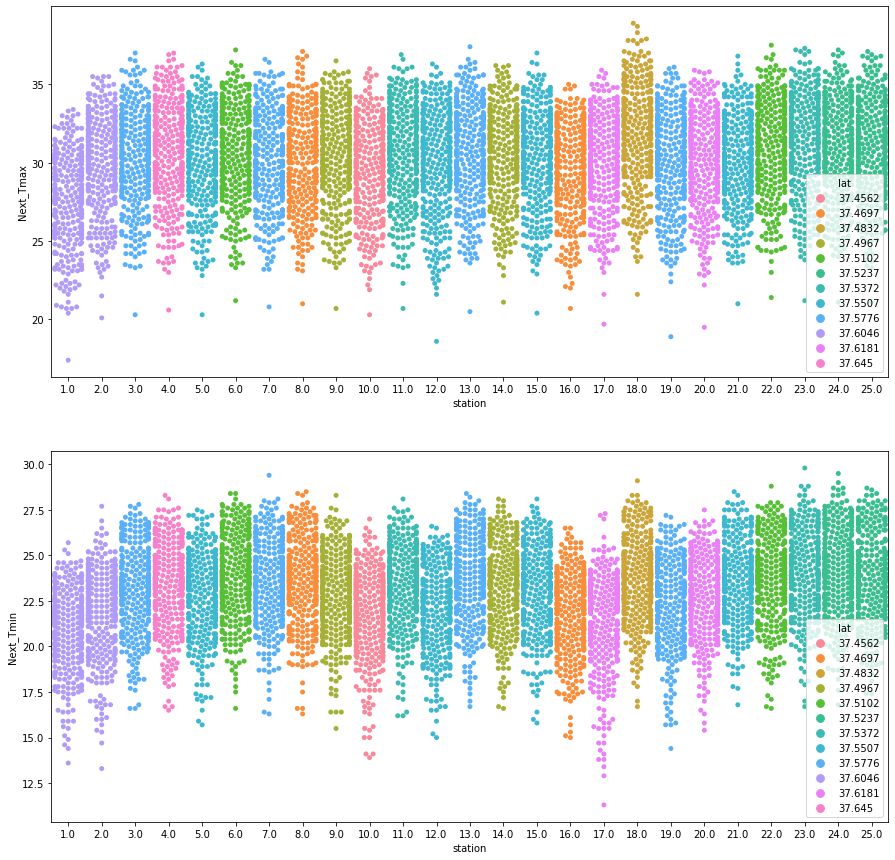

In [27]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.swarmplot(x='station',y='Next_Tmax',hue='lat',data=df)

plt.subplot(2,1,2)
sns.swarmplot(x='station',y='Next_Tmin',hue='lat',data=df)

Each station is located on a particular lalitude. There are atmost 3 staions on a single latitude, and as the latitude decreases, temperature seem to increase.

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

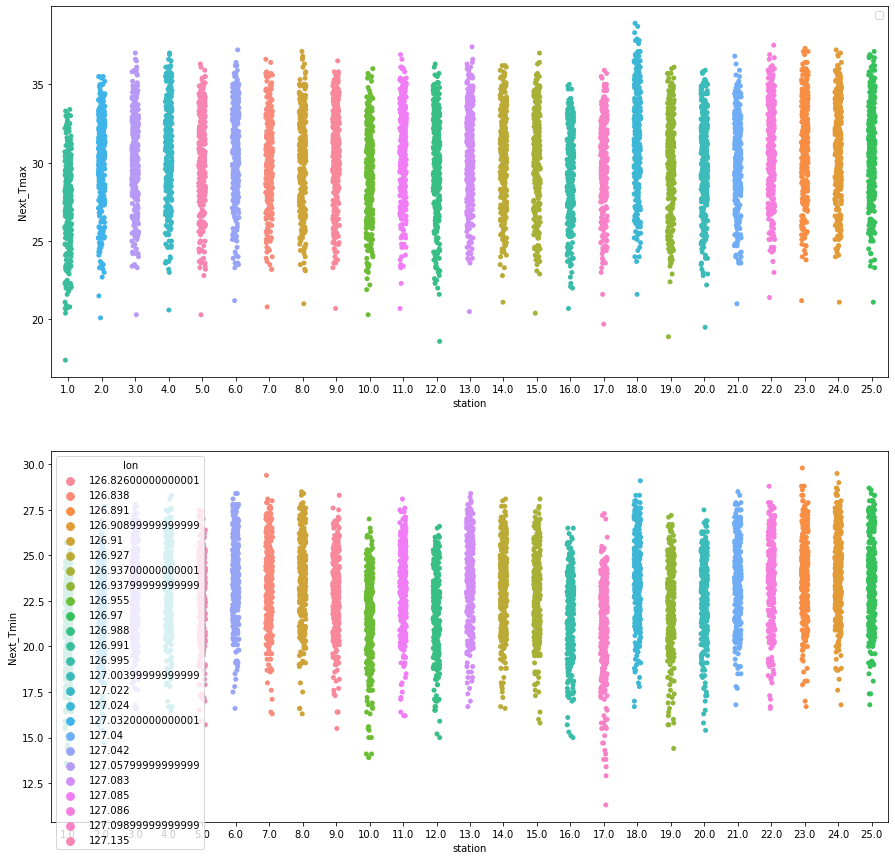

In [28]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.stripplot(x='station',y='Next_Tmax',hue='lon',data=df)
plt.legend('')

plt.subplot(2,1,2)
sns.stripplot(x='station',y='Next_Tmin',hue='lon',data=df)

Each station belongs to a particular longitude. There is only one statiton belonging to a longitude. As the longitude does not affect the temperatures much, these graphs are similar to the station vs latitudes graph.

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

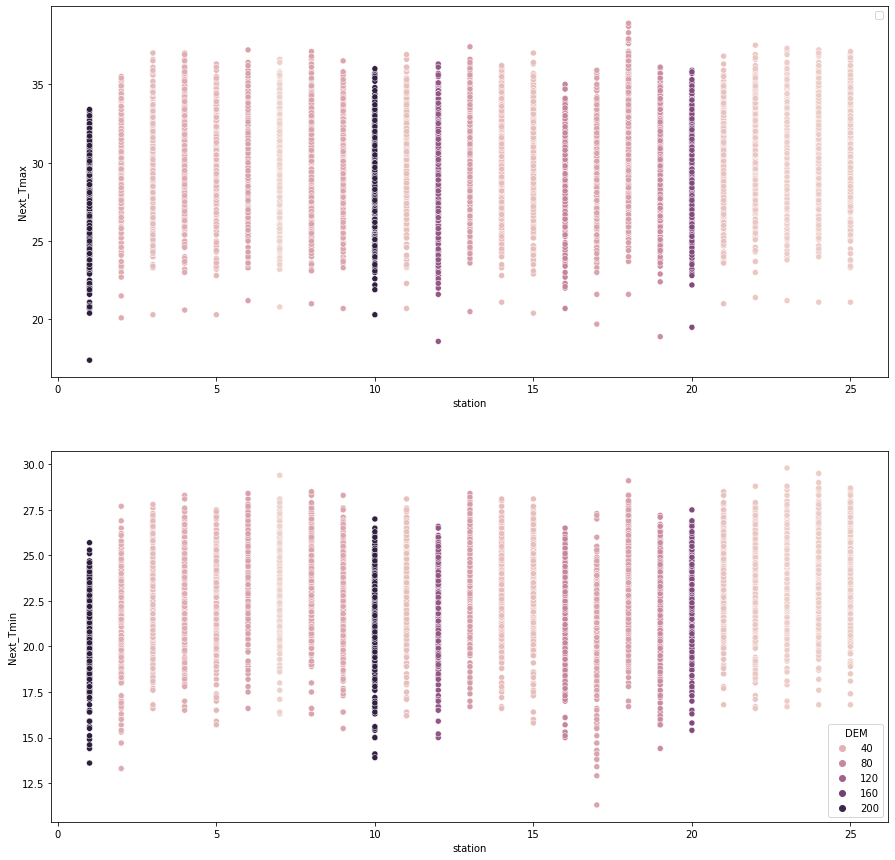

In [29]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.scatterplot(x='station',y='Next_Tmax',hue='DEM',data=df)
plt.legend('')

plt.subplot(2,1,2)
sns.scatterplot(x='station',y='Next_Tmin',hue='DEM',data=df)

Each station belong to a particular elevation. There is only one statiton belonging to a particular elevation. Highest tmax is noted at station 18 which have an elevation 56.44 even though it is not the lowest elevation, which indicates that elevation alone does not decide the temperature

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='LDAPS_CC4'>

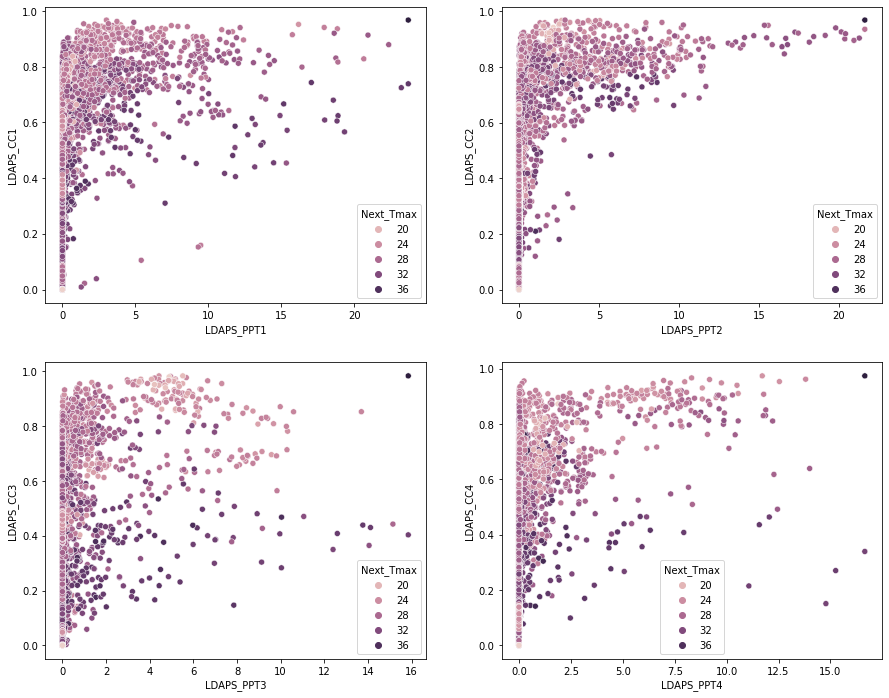

In [30]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.scatterplot(x='LDAPS_PPT1',y='LDAPS_CC1',hue='Next_Tmax',data=df)

plt.subplot(2,2,2)
sns.scatterplot(x='LDAPS_PPT2',y='LDAPS_CC2',hue='Next_Tmax',data=df)

plt.subplot(2,2,3)
sns.scatterplot(x='LDAPS_PPT3',y='LDAPS_CC3',hue='Next_Tmax',data=df)

plt.subplot(2,2,4)
sns.scatterplot(x='LDAPS_PPT4',y='LDAPS_CC4',hue='Next_Tmax',data=df)

1. In the 1st split of cloud cover and precipitaion, precipitation increases after the value of cloud cover crosses 0.3 
2. While this threshold increases to 0.5, in the 2nd split, after which it starts to decrease for all the splits. Tmax is higher when there cloud cover and precipitation both have lower value. We also see the presence of outliers.

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='LDAPS_CC4'>

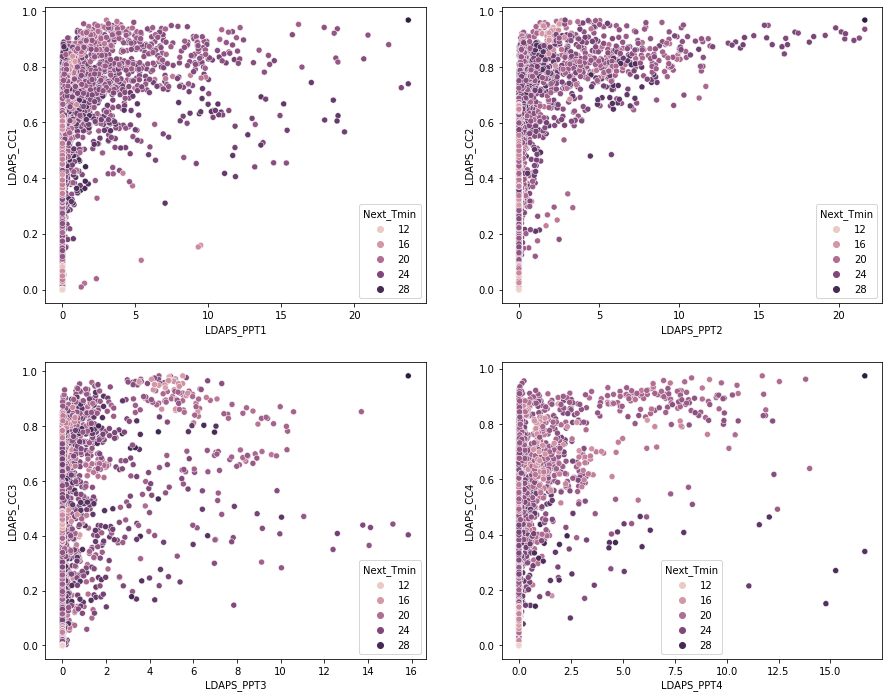

In [31]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.scatterplot(x='LDAPS_PPT1',y='LDAPS_CC1',hue='Next_Tmin',data=df)

plt.subplot(2,2,2)
sns.scatterplot(x='LDAPS_PPT2',y='LDAPS_CC2',hue='Next_Tmin',data=df)

plt.subplot(2,2,3)
sns.scatterplot(x='LDAPS_PPT3',y='LDAPS_CC3',hue='Next_Tmin',data=df)

plt.subplot(2,2,4)
sns.scatterplot(x='LDAPS_PPT4',y='LDAPS_CC4',hue='Next_Tmin',data=df)

1. In the 1st split of cloud cover and precipitaion, precipitation increases after a value of cloud cover crosses 0.3 
2. While this threshold increases to 0.5, in the 2nd split, after which it starts to decrease for all the splits. Tmin is higher when there cloud cover and precipitation both have lower value.

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='LDAPS_Tmin_lapse'>

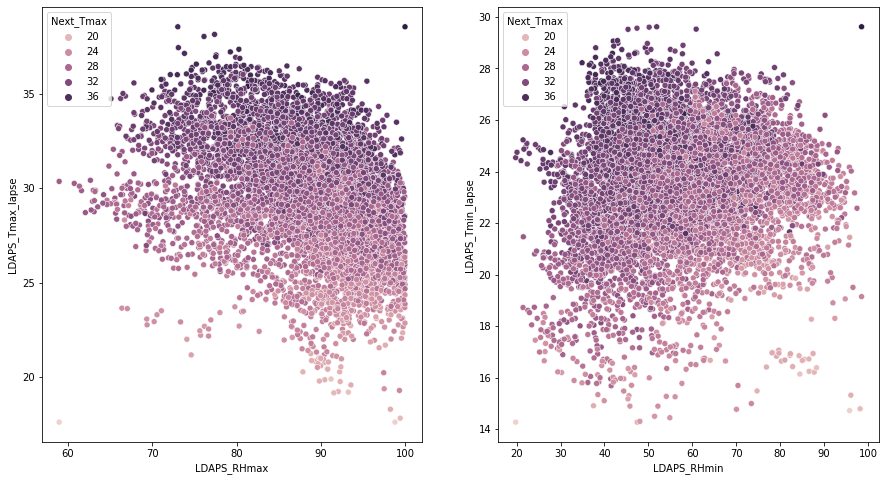

In [32]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.scatterplot(x='LDAPS_RHmax',y='LDAPS_Tmax_lapse',hue='Next_Tmax',data=df)

plt.subplot(1,2,2)
sns.scatterplot(x='LDAPS_RHmin',y='LDAPS_Tmin_lapse',hue='Next_Tmax',data=df)

As RHmax increases, Tmax lapse rate decreases and Next day Tmax also seem to decrease while as Rhmin increases Tmin lapse rate also seem to increase but Next dat Tmax decreases

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='LDAPS_Tmin_lapse'>

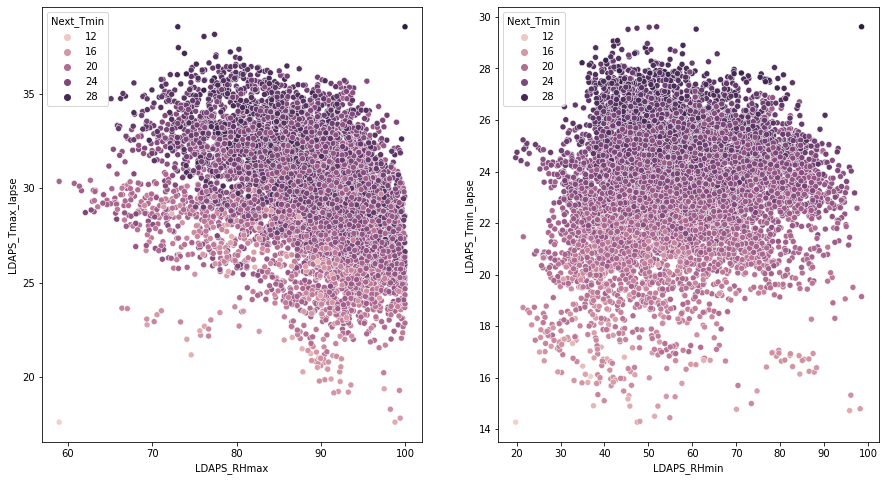

In [33]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.scatterplot(x='LDAPS_RHmax',y='LDAPS_Tmax_lapse',hue='Next_Tmin',data=df)

plt.subplot(1,2,2)
sns.scatterplot(x='LDAPS_RHmin',y='LDAPS_Tmin_lapse',hue='Next_Tmin',data=df)

As RHmax increases, Tmax lapse rate decreases and Next day Tmin also seem to decrease while as Rhmin increases Tmin lapse rate also seem to increase but Next dat Tmin decreases

<AxesSubplot:>

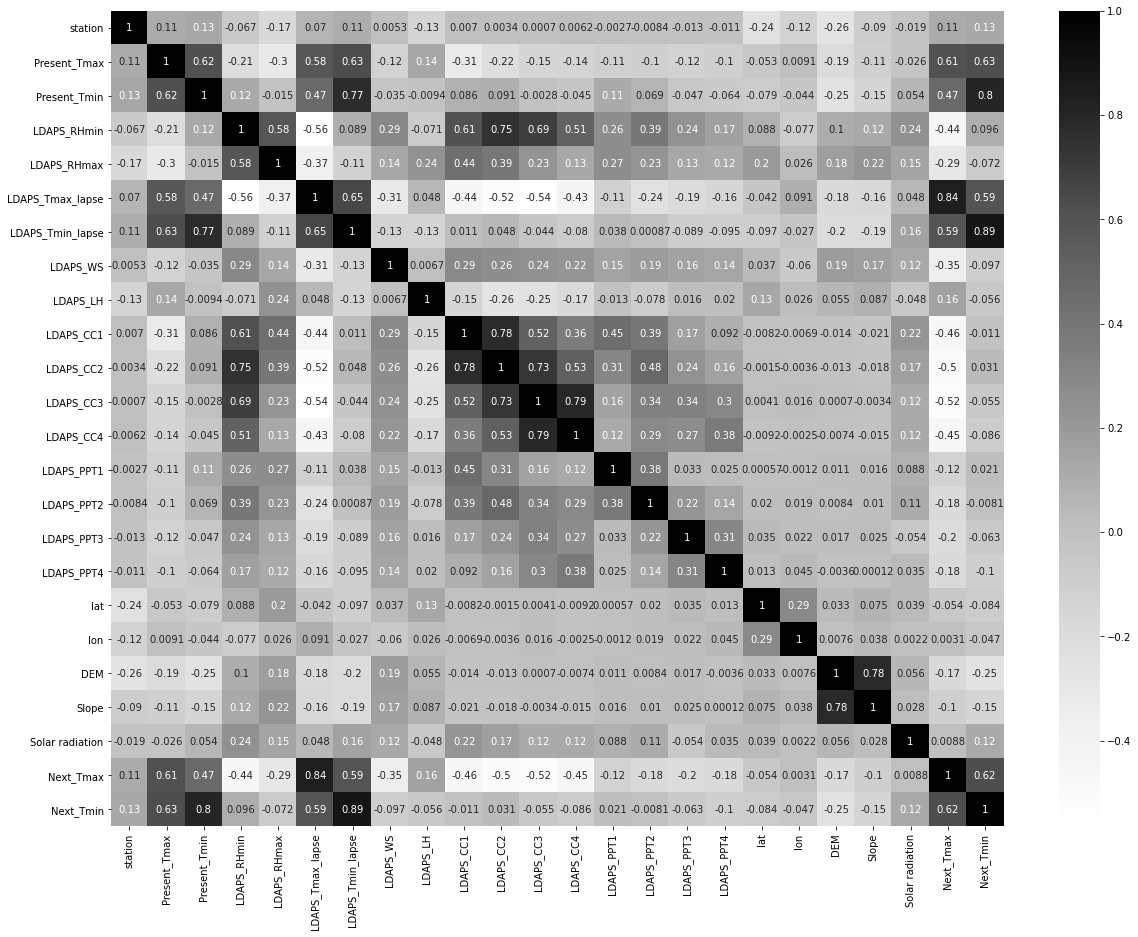

In [34]:
#Displaying the correlation between numerical columns via heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='Greys')

Conclusions:
    
    1. There is high correlation among the following columns
        -- Next day Tmax and Tmin with Present day Tmax and Tmin
        -- Tmax applied lapse rate and Tmin applied lapse rate
    2. There is also a high negative correlation 
        -- Tmax with cloud cover splits and relative minimum humidity
    3. There is also high correlation between many independent features
       such as Present Day Tmax and Tmin, elevation amd slope 

In [36]:
df['Slope'].unique()

array([2.785    , 0.5141   , 0.2661   , 2.5348   , 0.5055   , 0.1457   ,
       0.0985   , 1.5629   , 0.4125   , 5.1782   , 0.6233   , 0.5931   ,
       2.6865   , 0.618    , 0.8552   , 2.2579   , 0.697    , 1.2313   ,
       1.7678   , 4.7296   , 0.5721   , 0.1332   , 0.1554   , 0.2223   ,
       0.2713   , 0.0984746, 5.17823  ])

In [37]:
df['Slope'].replace({0.0984746:0.0985,5.17823:5.1782},inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '0.09847460000000001'),
  Text(1, 0, '0.0985'),
  Text(2, 0, '0.1332'),
  Text(3, 0, '0.1457'),
  Text(4, 0, '0.1554'),
  Text(5, 0, '0.2223'),
  Text(6, 0, '0.2661'),
  Text(7, 0, '0.2713'),
  Text(8, 0, '0.4125'),
  Text(9, 0, '0.5055'),
  Text(10, 0, '0.5141'),
  Text(11, 0, '0.5721'),
  Text(12, 0, '0.5931'),
  Text(13, 0, '0.618'),
  Text(14, 0, '0.6233'),
  Text(15, 0, '0.6970000000000001'),
  Text(16, 0, '0.8552'),
  Text(17, 0, '1.2313'),
  Text(18, 0, '1.5629'),
  Text(19, 0, '1.7678'),
  Text(20, 0, '2.2579'),
  Text(21, 0, '2.5348'),
  Text(22, 0, '2.6865'),
  Text(23, 0, '2.785'),
  Text(24, 0, '4.7296'),
  Text(25, 0, '5.1782')])

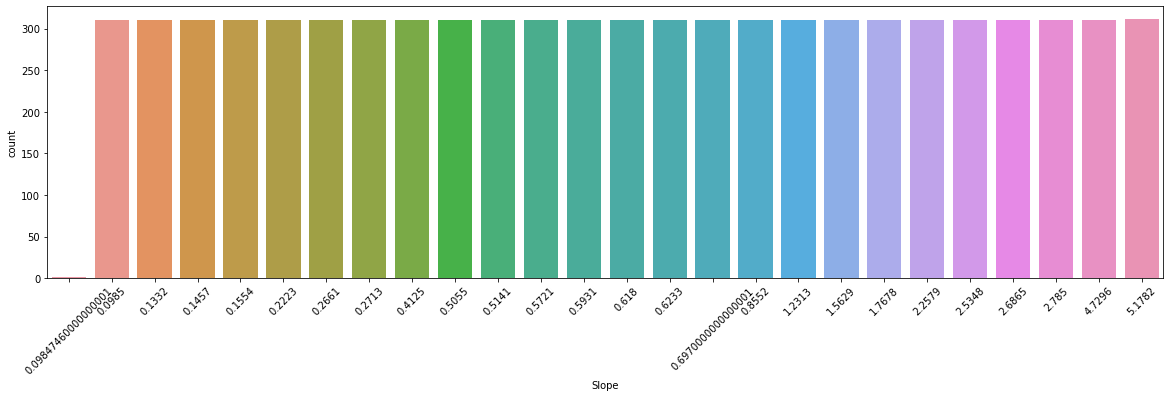

In [38]:
plt.figure(figsize=(20,5))
sns.countplot(df['Slope'])
plt.xticks(rotation=45)

In [39]:
from scipy.stats import mode

In [40]:
#We need to drop these rows as these are the label columns cannot impute null values to these 
df=df[df['Next_Tmax'].notnull()]

In [41]:
table=pd.pivot_table(values='station',index='Slope',data=df)
table.head()

station
Slope          
0.0985      7.0
0.1332     22.0
0.1457      6.0
0.1554     23.0
0.2223     24.0

Filling nan values of station from slope column as slope serves as an identifier column to station.

In [42]:
#Deleting rows which have atleast 14 null values
df.dropna(subset=df.columns, thresh=14,inplace=True)

In [43]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

In [44]:
df.drop('Date',axis=1,inplace=True)

In [45]:
#Dropping null values as well upon evalution as this gives better result than imputing them with mean values
df.dropna(inplace=True)

<AxesSubplot:>

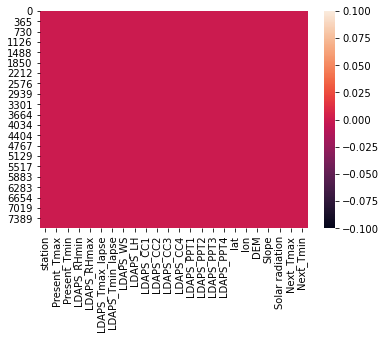

In [46]:
sns.heatmap(df.isnull())

#### Outlier removal using z-score


In [48]:
#Function to choose the right threshold 
def threshold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [49]:
#Using zscore method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold(z,df)

With threshold 3.0 data loss is 11.19%
With threshold 3.2 data loss is 9.66%
With threshold 3.4 data loss is 8.45%
With threshold 3.6 data loss is 7.7%
With threshold 3.8 data loss is 6.96%
With threshold 4.0 data loss is 6.31%
With threshold 4.2 data loss is 5.88%
With threshold 4.4 data loss is 5.27%
With threshold 4.6 data loss is 4.82%
With threshold 4.8 data loss is 4.39%


In [50]:
#We use threshold as 4.2 because data is expensive and upon evaluation of models this threhold turned out to be the best.
df=df[(z<4.2).all(axis=1)]

In [51]:
df.skew()

station            -0.003604
Present_Tmax       -0.302335
Present_Tmin       -0.358198
LDAPS_RHmin         0.324225
LDAPS_RHmax        -0.804339
LDAPS_Tmax_lapse   -0.199966
LDAPS_Tmin_lapse   -0.565344
LDAPS_WS            1.290893
LDAPS_LH            0.634948
LDAPS_CC1           0.537584
LDAPS_CC2           0.494844
LDAPS_CC3           0.696316
LDAPS_CC4           0.699901
LDAPS_PPT1          3.963273
LDAPS_PPT2          4.625493
LDAPS_PPT3          5.625846
LDAPS_PPT4          6.144907
lat                 0.089824
lon                -0.279586
DEM                 1.734113
Slope               1.575114
Solar radiation    -0.528426
Next_Tmax          -0.325958
Next_Tmin          -0.395490
dtype: float64

Some of the columns are still skewed. Let us perform another round of skew removal by Power Tranformer

In [52]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [53]:
for i in cont:
    if np.abs(df[i].skew())>=0.5:
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))

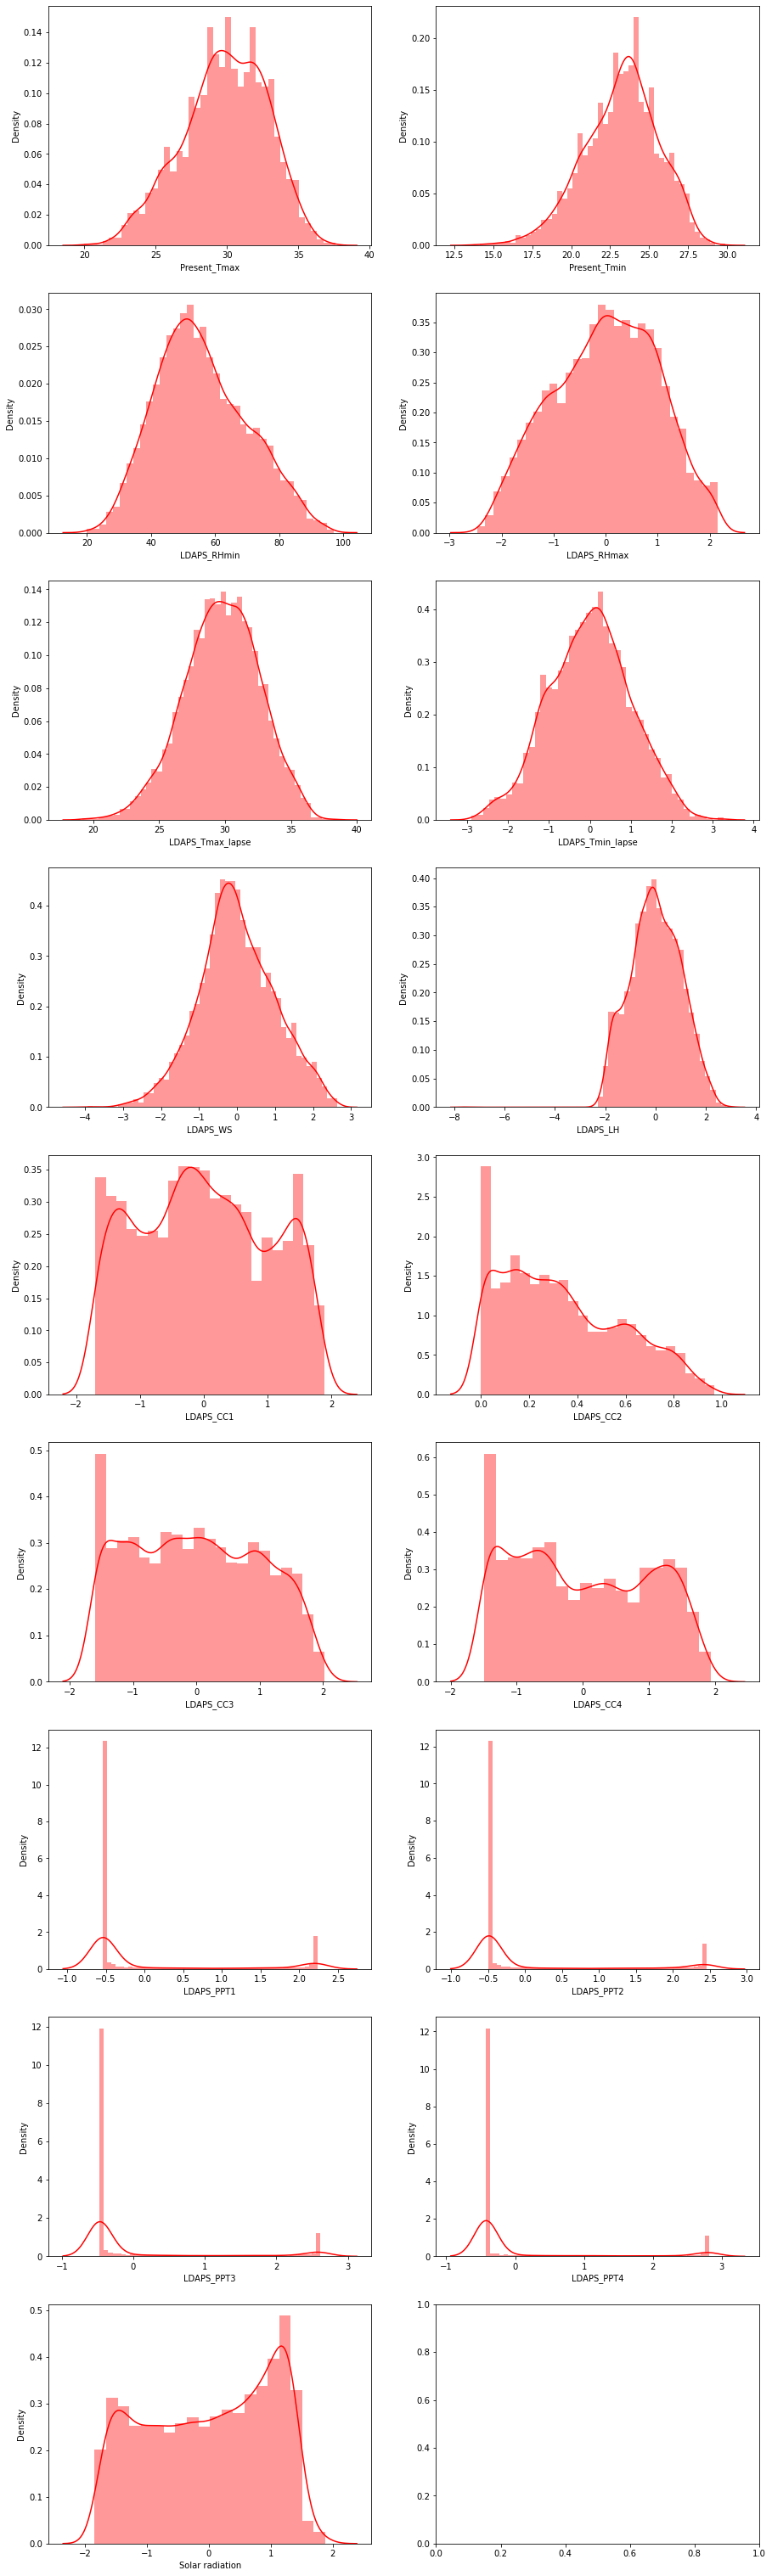

In [54]:
fig,ax=plt.subplots(9,2,figsize=(15,55))
r=0
c=0
for i, n in enumerate(cont[:-2]):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(df[n],color='r',ax=ax[r,c])
    c+=1

In [56]:
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688     0.327399   
1      2.0          31.9          21.6    52.263397     0.241088   
2      3.0          31.6          23.3    48.690479    -0.717870   
3      4.0          32.0          23.4    58.239788     1.354449   
4      5.0          31.4          21.9    56.174095     0.166802   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0         28.074101         -0.328551  0.140212  0.336539  -0.347491   
1         29.850689          0.124897 -0.589325 -0.175111  -0.387673   
2         30.091292          0.373301 -0.274753 -1.384399  -0.466108   
3         29.704629         -0.191615 -0.620826  0.233679  -0.431764   
4         29.113934         -0.121549 -0.557246  1.270228  -0.764208   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896  -0.482761  -0.530798   -0.543692   -0.497271   -0.474956   
1   0.251771  -0.495728  -0.550618   -0.543692   -0.497271   -0.474956   
2   0.257469  -0.249587  -0.462662   -0.543692   -0.497271   -0.474956   
3   0.226002  -0.485860  -0.510400   -0.543692   -0.497271   -0.474956   
4   0.249995  -0.385744  -0.300633   -0.543692   -0.497271   -0.474956   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0   -0.425576  37.6046  126.991  212.3350  2.7850         1.878811       29.1   
1   -0.425576  37.6046  127.032   44.7624  0.5141         1.420633       30.5   
2   -0.425576  37.5776  127.058   33.3068  0.2661         1.400187       31.1   
3   -0.425576  37.6450  127.022   45.7160  2.5348         1.376875       31.7   
4   -0.425576  37.5507  127.135   35.0380  0.5055         1.386015       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

## Machine learning algorithms

In [57]:
#Separating dependent and independent features.
x=df.copy()
x.drop(['Next_Tmax','Next_Tmin'],axis=1,inplace=True)
ymax=df['Next_Tmax']
ymin=df['Next_Tmin']

In [58]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [59]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

In [93]:
#importing model training and metrics dependancies
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
#importing metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [62]:
#Choosing the best random state using LinearRegression
def randomstate(a,b):
    maxx=10000000000000
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(p,ytest)
        if maxx>mse:
            maxx=mse
            j=state
    return j

In [63]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),SVR(),LinearRegression(),Ridge(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

model_names=['KNeighborsRegressor','SVR','LinearRegression','Ridge','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor']

In [64]:
def createmodels(model_list,x,y,n):
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,x,y,cv=5)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2)*100)
        mcv.append(np.round(np.mean(score),2)*100)
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross Validation Score']=mcv
    data.set_index('Model',inplace = True)
    return data   

In [65]:
createmodels(models,x,ymax,model_names)

Mean Absolute Error  Mean Squared Error  \
Model                                                                
KNeighborsRegressor                     1.0438              1.9286   
SVR                                     0.8461              1.3286   
LinearRegression                        1.0455              1.8499   
Ridge                                   1.0446              1.8511   
DecisionTreeRegressor                   0.9955              1.9721   
RandomForestRegressor                   0.7098              0.9036   
AdaBoostRegressor                       1.1851              2.1526   
GradientBoostingRegressor               0.8890              1.3172   
XGBRegressor                            0.6537              0.7525   

                           Root Mean Squared Error  R2 Score  \
Model                                                          
KNeighborsRegressor                         1.3887      70.0   
SVR                                         1.1526      82.0   
LinearRegression                            1.3601      74.0   
Ridge                                       1.3606      74.0   
DecisionTreeRegressor                       1.4043      79.0   
RandomForestRegressor                       0.9506      88.0   
AdaBoostRegressor                           1.4672      63.0   
GradientBoostingRegressor                   1.1477      82.0   
XGBRegressor                                0.8674      91.0   

                           Mean of Cross Validation Score  
Model                                                      
KNeighborsRegressor                                  47.0  
SVR                                                  65.0  
LinearRegression                                     70.0  
Ridge                                                70.0  
DecisionTreeRegressor                                44.0  
RandomForestRegressor                                68.0  
AdaBoostRegressor                                    66.0  
GradientBoostingRegressor                            70.0  
XGBRegressor                                         66.0

Conclusion:
     
     1. For predicting the Next day Maximum Temperature - Xtreme Gradient Boost gives us the least error value 
     2. Ridge regressor, Linear regressor and Gradient Boosting Model give us the highest mean of cross validation score

#### Reducing Multicollinearity using Lasso 

#### for TMax

In [78]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(x,ymax)
print(m1.best_params_)

{'alpha': 0.001}


In [68]:
m1=Lasso(alpha=0.001)
m1.fit(x,ymax)

Lasso(alpha=0.001)

In [69]:
importance = np.abs(m1.coef_)

In [70]:
dfcolumns = pd.DataFrame(x.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores

Features  Coefficients
0            station      0.414879
1       Present_Tmax      2.893795
2       Present_Tmin      0.446038
3        LDAPS_RHmin      1.864469
4        LDAPS_RHmax      0.031077
5   LDAPS_Tmax_lapse     12.244269
6   LDAPS_Tmin_lapse      1.269848
7           LDAPS_WS      1.790647
8           LDAPS_LH      2.673350
9          LDAPS_CC1      0.291536
10         LDAPS_CC2      0.624178
11         LDAPS_CC3      0.508918
12         LDAPS_CC4      1.268095
13        LDAPS_PPT1      0.509906
14        LDAPS_PPT2      0.235777
15        LDAPS_PPT3      0.145450
16        LDAPS_PPT4      0.202230
17               lat      0.114069
18               lon      0.495785
19               DEM      0.731490
20             Slope      0.766536
21   Solar radiation      0.214956

##### For Tmin

In [71]:
param_grid={'alpha':[0.001,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(x,ymin)
print(m1.best_params_)

{'alpha': 0.001}


In [72]:
m1=Lasso(alpha=0.001)
m1.fit(x,ymin)

Lasso(alpha=0.001)

In [73]:
importance = np.abs(m1.coef_)

In [74]:
dfcolumns = pd.DataFrame(x.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
#naming the dataframe columns
featureScores.columns = ['Features','Coefficients'] 
featureScores

Features  Coefficients
0            station      0.000000
1       Present_Tmax      0.945348
2       Present_Tmin      3.796597
3        LDAPS_RHmin      1.725220
4        LDAPS_RHmax      0.562750
5   LDAPS_Tmax_lapse      2.433243
6   LDAPS_Tmin_lapse      8.339272
7           LDAPS_WS      0.612477
8           LDAPS_LH      0.238134
9          LDAPS_CC1      0.000000
10         LDAPS_CC2      0.389434
11         LDAPS_CC3      0.013656
12         LDAPS_CC4      0.057020
13        LDAPS_PPT1      0.276027
14        LDAPS_PPT2      0.457960
15        LDAPS_PPT3      0.125597
16        LDAPS_PPT4      0.303647
17               lat      0.162898
18               lon      0.173483
19               DEM      1.465057
20             Slope      1.040179
21   Solar radiation      0.086698

In [75]:
#Since station has 0, we can drop this column and re-check the performance of our models
xlasso=x.drop('station',axis=1)

In [76]:
createmodels(models,xlasso,ymin,model_names)

Mean Absolute Error  Mean Squared Error  \
Model                                                                
KNeighborsRegressor                     0.7397              0.9733   
SVR                                     0.6082              0.6085   
LinearRegression                        0.7641              0.9226   
Ridge                                   0.7642              0.9220   
DecisionTreeRegressor                   0.8635              1.3439   
RandomForestRegressor                   0.5650              0.5484   
AdaBoostRegressor                       0.8617              1.1357   
GradientBoostingRegressor               0.6311              0.6406   
XGBRegressor                            0.4787              0.3905   

                           Root Mean Squared Error  R2 Score  \
Model                                                          
KNeighborsRegressor                         0.9866      78.0   
SVR                                         0.7801      88.0   
LinearRegression                            0.9605      82.0   
Ridge                                       0.9602      81.0   
DecisionTreeRegressor                       1.1593      77.0   
RandomForestRegressor                       0.7405      89.0   
AdaBoostRegressor                           1.0657      75.0   
GradientBoostingRegressor                   0.8003      87.0   
XGBRegressor                                0.6249      93.0   

                           Mean of Cross Validation Score  
Model                                                      
KNeighborsRegressor                                  46.0  
SVR                                                  74.0  
LinearRegression                                     78.0  
Ridge                                                78.0  
DecisionTreeRegressor                                57.0  
RandomForestRegressor                                78.0  
AdaBoostRegressor                                    74.0  
GradientBoostingRegressor                            80.0  
XGBRegressor                                         77.0

Performance of the models have increased. Similarly,eerrors have been reduced and mean cross validation score of XGBRegressor has increased. So we keep this as the best model  dataset for predicting Next day minumum Temperature.

### Hyperparameter Tuning

In [83]:
xtrain_max,xtest_max,ytrain_max,ytest_max=train_test_split(x,ymax,test_size=0.25,random_state=randomstate(x,ymax))

#### Ridge Regressor

In [84]:
params={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,200,
                     230, 250,265, 270, 275, 290, 300, 500,1000]}

In [85]:
g=GridSearchCV(Ridge(),params,cv=10)

In [86]:
g.fit(xtrain_max,ytrain_max)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.1, 1, 5,
                                   10, 15, 20, 30, 35, 45, 50, 55, 65, 100, 110,
                                   150, 200, 230, 250, 265, 270, 275, 290, 300,
                                   500, 1000]})

In [87]:
print(g.best_params_)
print(g.best_score_)

{'alpha': 0.1}
0.7613510980492191


In [88]:
model=Ridge(alpha=0.1)
model.fit(xtrain_max,ytrain_max)
pred=model.predict(xtest_max)

In [89]:
score=cross_val_score(model,x,ymax,cv=10)

In [90]:
print('Mean Absolute Error is',np.round(mean_absolute_error(pred,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(pred,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(pred,ytest_max)),4))
print('R2 Score is',np.round(r2_score(pred,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 1.0453
Mean Squared Error is 1.8499
Root Mean Squared Error is 1.3601
R2 Score is 73.89
Mean of cross validaton Score is 66.3539


##### Gradient Boost

In [94]:
params={'n_estimators':[100,200,300],
      'learning_rate':[0.001,0.01,0.1],
      'subsample':[0.5,1],
      'max_depth':[2,4,6,8,10]}

In [95]:
gb=RandomizedSearchCV(GradientBoostingRegressor(),params,cv=10)

In [96]:
gb.fit(xtrain_max,ytrain_max)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.5, 1]})

In [100]:
print(gb.best_params_)
print(gb.best_score_)

{'subsample': 1, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1}
0.9133197350400624


In [104]:
Bmd=GradientBoostingRegressor(max_depth=6, n_estimators=200, subsample=1, learning_rate=0.1)
Bmd.fit(xtrain_max,ytrain_max)
pred=Bmd.predict(xtest_max)

In [105]:
score=cross_val_score(Bmd,x,ymax,cv=10)

In [106]:
print('Mean Absolute Error is',np.round(mean_absolute_error(pred,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(pred,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(pred,ytest_max)),4))
print('R2 Score is',np.round(r2_score(pred,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.6373
Mean Squared Error is 0.7397
Root Mean Squared Error is 0.8601
R2 Score is 90.66
Mean of cross validaton Score is 65.0495


#### Extreme Gradient Boost

In [107]:
params={
     "learning_rate"    : [0.001,0.05,0.1] ,
     "max_depth"        : [5,6,8,10,12,15,20,25,30],
     "min_child_weight" : [1,3,5,10],
     "gamma"            : [0.0,0.1,0.2,0.3,0.4,0.5],
     "colsample_bytree" : [0.3,0.4,0.5,0.7]
    }

In [108]:
xgb=RandomizedSearchCV(XGBRegressor(verbosity=0),params,cv=10,n_jobs=-2)

In [109]:
xgb.fit(xtrain_max,ytrain_max)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_la

In [110]:
print(xgb.best_params_)
print(xgb.best_score_)

{'min_child_weight': 3, 'max_depth': 25, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}
0.912594405800237


In [113]:
Bmd=XGBRegressor(colsample_bytree=0.7,gamma=0.1,learning_rate=0.1,max_depth=25, min_child_weight=3)
Bmd.fit(xtrain_max,ytrain_max)
pred=Bmd.predict(xtest_max)

In [114]:
score=cross_val_score(Bmd,x,ymax,cv=10)

In [115]:
print('Mean Absolute Error is',np.round(mean_absolute_error(pred,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(pred,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(pred,ytest_max)),4))
print('R2 Score is',np.round(r2_score(pred,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.6439
Mean Squared Error is 0.7215
Root Mean Squared Error is 0.8494
R2 Score is 90.75
Mean of cross validaton Score is 66.3502


#### For Next day Minimun Temperature

In [116]:
xtrain_min,xtest_min,ytrain_min,ytest_min=train_test_split(xlasso,ymin,test_size=0.25,random_state=randomstate(xlasso,ymin))

#### Extreme Gradient Boost

In [117]:
params={
     "learning_rate"    : [0.001,0.05,0.1] ,
     "max_depth"        : [5,6,8,10,12,15,20,25,30],
     "min_child_weight" : [1,3,5,10],
     "gamma"            : [0.0,0.1,0.2,0.3,0.4,0.5],
     "colsample_bytree" : [0.3,0.4,0.5,0.7]
    }

In [118]:
g=RandomizedSearchCV(XGBRegressor(verbosity=0),params,cv=10)

In [119]:
g.fit(xtrain_min,ytrain_min)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_la

In [120]:
print(g.best_params_)
print(g.best_score_)

{'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.4}
0.929315393018188


In [133]:
Bmd1=XGBRegressor(min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4)
Bmd1.fit(xtrain_min,ytrain_min)
pred=Bmd1.predict(xtest_min)

In [134]:
score=cross_val_score(Bmd1,xlasso,ymin,cv=10)

In [135]:
print('Mean Absolute Error is',np.round(mean_absolute_error(pred,ytest_min),4))
print('Mean Squared Error is',np.round(mean_squared_error(pred,ytest_min),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(pred,ytest_min)),4))
print('R2 Score is',np.round(r2_score(pred,ytest_min),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.4739
Mean Squared Error is 0.373
Root Mean Squared Error is 0.6107
R2 Score is 92.78999999999999
Mean of cross validaton Score is 75.5801


#### Gradient Boost

In [136]:
params={'n_estimators':[100,200,300],
      'learning_rate':[0.001,0.01,0.1],
      'subsample':[0.5,1],
      'max_depth':[2,4,6,8,10]}

In [137]:
from sklearn.model_selection import RandomizedSearchCV
xg=RandomizedSearchCV(GradientBoostingRegressor(),params,cv=10)

In [138]:
xg.fit(xtrain_min,ytrain_min)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.5, 1]})

In [139]:
print(xg.best_params_)
print(xg.best_score_)

{'subsample': 1, 'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.1}
0.9242192501871014


In [142]:
GB=GradientBoostingRegressor(max_depth=8, n_estimators=200, subsample=1, learning_rate=0.1)
GB.fit(xtrain_min,ytrain_min)
Pred=GB.predict(xtest_min)

In [143]:
score=cross_val_score(GB,xlasso,ymin,cv=10)

In [144]:
print('Mean Absolute Error is',np.round(mean_absolute_error(Pred,ytest_min),4))
print('Mean Squared Error is',np.round(mean_squared_error(Pred,ytest_min),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(Pred,ytest_min)),4))
print('R2 Score is',np.round(r2_score(Pred,ytest_min),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.4743
Mean Squared Error is 0.3918
Root Mean Squared Error is 0.626
R2 Score is 92.63
Mean of cross validaton Score is 74.7556


### Finalizing the model

#### Predicting the max temperature for the next day

In [147]:
model_tmax=XGBRegressor(colsample_bytree=0.7,gamma=0.1,learning_rate=0.1,max_depth=25, min_child_weight=3)
model_tmax.fit(xtrain_max,ytrain_max)
p_tmax=model_tmax.predict(xtest_max)
score_tmax=cross_val_score(model_tmax,x,ymax,cv=10)

#### Predicting the min temperature for the next day

In [148]:
model_tmin=XGBRegressor(min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4)
model_tmin.fit(xtrain_min,ytrain_min)
p_tmin=model_tmin.predict(xtest_min)
score_tmin=cross_val_score(model_tmin,xlasso,ymin,cv=10)

### Evaluation Metrics

In [149]:
print('Evaluation Metrics for Next Day Maximum Temperature')
print('Mean Absolute Error is',np.round(mean_absolute_error(p_tmax,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p_tmax,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p_tmax,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p_tmax,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score_tmax)*100,4))

Evaluation Metrics for Next Day Maximum Temperature
Mean Absolute Error is 0.6439
Mean Squared Error is 0.7215
Root Mean Squared Error is 0.8494
R2 Score is 90.75
Mean of cross validaton Score is 66.3502


In [150]:
print('Evaluation Metrics for Next Day Minimum Temperature')
print('Mean Absolute Error is',np.round(mean_absolute_error(p_tmin,ytest_min),4))
print('Mean Squared Error is',np.round(mean_squared_error(p_tmin,ytest_min),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p_tmin,ytest_min)),4))
print('R2 Score is',np.round(r2_score(p_tmin,ytest_min),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score_tmin)*100,4))

Evaluation Metrics for Next Day Minimum Temperature
Mean Absolute Error is 0.4739
Mean Squared Error is 0.373
Root Mean Squared Error is 0.6107
R2 Score is 92.78999999999999
Mean of cross validaton Score is 75.5801


Text(0.5, 1.0, 'Prediction of Minimum Temperature using Xtreme Gradient Regressor')

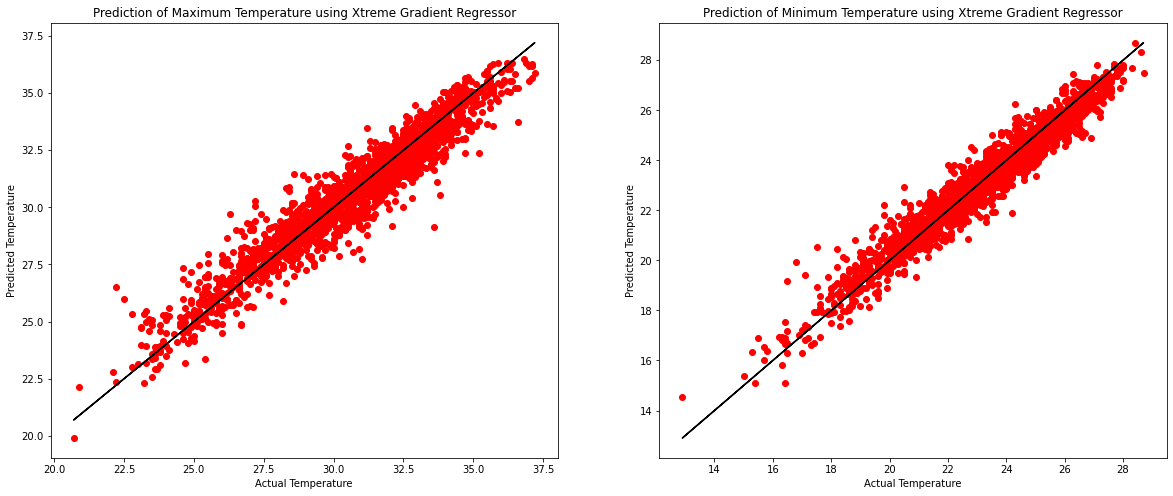

In [151]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(x=ytest_max,y=p_tmax,color='r')
plt.plot(ytest_max,ytest_max,color='k')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Prediction of Maximum Temperature using Xtreme Gradient Regressor')
plt.subplot(1,2,2)
plt.scatter(x=ytest_min,y=p_tmin,color='r')
plt.plot(ytest_min,ytest_min,color='k')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Prediction of Minimum Temperature using Xtreme Gradient Regressor')

#### Conclusion:

    1. There is a high Bias in our model for this dataset as we are getting a very good R2 score 
    2. Even though we have removed outliers and used ensemble techniques to reduce bias to the minimum, it exists.

#### Saving the best model - predicting TMax

In [152]:
import pickle
filename = 'Temperature-TMax.pkl'
pickle.dump(model_tmax, open(filename, 'wb'))

#### Saving the best model - predicting TMin

In [154]:
filename = 'Temperature-TMin.pkl'
pickle.dump(model_tmin, open(filename, 'wb'))